# Projet Apprentissage Statistiques - DIAKITE GAOUSSOU

In [1]:
# Les librairie 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import shapiro


from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
import statsmodels.api as sm


import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt




import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")



In [2]:
# Importation des données
transp = pd.read_csv("Data/transport1.txt", sep=" ", quotechar='"', skipinitialspace=True)

In [3]:
transp.head()

,CO2,Incid,CA,Port.1,Port.2,Port.3,Port.4,Port.5,Port.6,Port.7,...,Port.51,Port.52,Port.53,Port.54,Port.55,Port.56,Port.57,Port.58,Port.59,Port.60
1,6.26,11,0,24.61,0.65,9.51,0.25,9.03,0.71,15.22,...,15.17,6.83,6.16,18.91,10.60,14.74,18.42,16.27,13.34,17.17
2,7.51,8,0,24.43,1.84,12.94,0.56,8.04,1.31,12.62,...,10.85,5.95,6.82,19.10,10.29,12.02,16.95,16.63,14.57,19.50
3,4.97,8,0,25.40,1.57,12.32,4.38,8.88,5.90,14.58,...,10.10,2.38,8.97,15.14,8.57,15.61,14.38,7.92,13.26,22.00
4,6.27,9,0,27.41,2.54,12.20,1.23,9.57,2.49,15.45,...,9.38,1.71,8.04,15.97,10.47,12.99,15.60,12.39,12.41,24.49
5,7.20,34,1,23.85,2.45,11.46,7.94,13.02,4.96,15.04,...,15.79,5.93,6.70,18.09,11.76,14.07,23.97,18.75,14.56,20.99


# 1. Analyse Exploratoire 

In [4]:
print(f'La base de données fait {transp.shape[0]} lignes et {transp.shape[1]} colonnes')

La base de données fait 37 lignes et 63 colonnes


In [5]:
# Les types des variables 
transp.dtypes

CO2        float64
Incid        int64
CA           int64
Port.1     float64
Port.2     float64
            ...   
Port.56    float64
Port.57    float64
Port.58    float64
Port.59    float64
Port.60    float64
Length: 63, dtype: object

## 1.2 Les infos de la base de donées  et Statistiques descriptives 

La base de données contient 60 variables explicatives et 4 variables à expliquer. 
Les 60 variables explicatives sont des flaots. Une variable à expliquer est int et les 3 autres sont floats 

In [6]:
transp.describe()

,CO2,Incid,CA,Port.1,Port.2,Port.3,Port.4,Port.5,Port.6,Port.7,...,Port.51,Port.52,Port.53,Port.54,Port.55,Port.56,Port.57,Port.58,Port.59,Port.60
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,7.464595,34.702703,0.405405,23.806486,2.045676,11.774865,4.061892,11.528649,3.693514,14.744865,...,13.658378,6.224324,7.876757,18.106216,10.729189,13.680000,18.608108,15.769730,12.394865,19.511622
std,1.309603,32.412159,0.497743,2.451436,1.091959,1.813494,2.466802,2.107645,2.337101,1.495706,...,2.626872,2.445325,2.466292,1.382581,1.695537,2.561506,3.096827,3.407783,1.716899,2.774452
min,4.970000,3.000000,0.000000,17.100000,0.150000,7.800000,0.250000,6.670000,0.280000,11.540000,...,8.060000,0.080000,3.340000,15.140000,7.630000,8.290000,13.100000,7.920000,8.460000,12.230000
25%,6.710000,13.000000,0.000000,22.430000,1.200000,10.250000,2.380000,9.920000,1.540000,13.570000,...,11.750000,5.310000,6.420000,16.990000,9.260000,12.190000,15.980000,13.460000,11.090000,17.580000
50%,7.410000,27.000000,0.000000,24.020000,2.110000,12.120000,3.450000,11.770000,3.970000,14.580000,...,13.550000,6.400000,7.270000,18.290000,10.600000,14.070000,18.420000,16.080000,13.040000,19.500000
75%,8.290000,42.000000,1.000000,25.350000,2.830000,12.940000,5.500000,12.740000,5.080000,15.970000,...,15.630000,7.770000,9.540000,19.100000,12.010000,15.710000,21.090000,17.970000,13.620000,20.990000
max,10.550000,152.000000,1.000000,28.380000,4.780000,15.290000,9.670000,16.530000,8.040000,17.760000,...,18.510000,11.030000,12.860000,21.100000,13.580000,17.560000,23.970000,21.710000,14.860000,25.670000


## 1.3 Data Viz 

<Axes: >

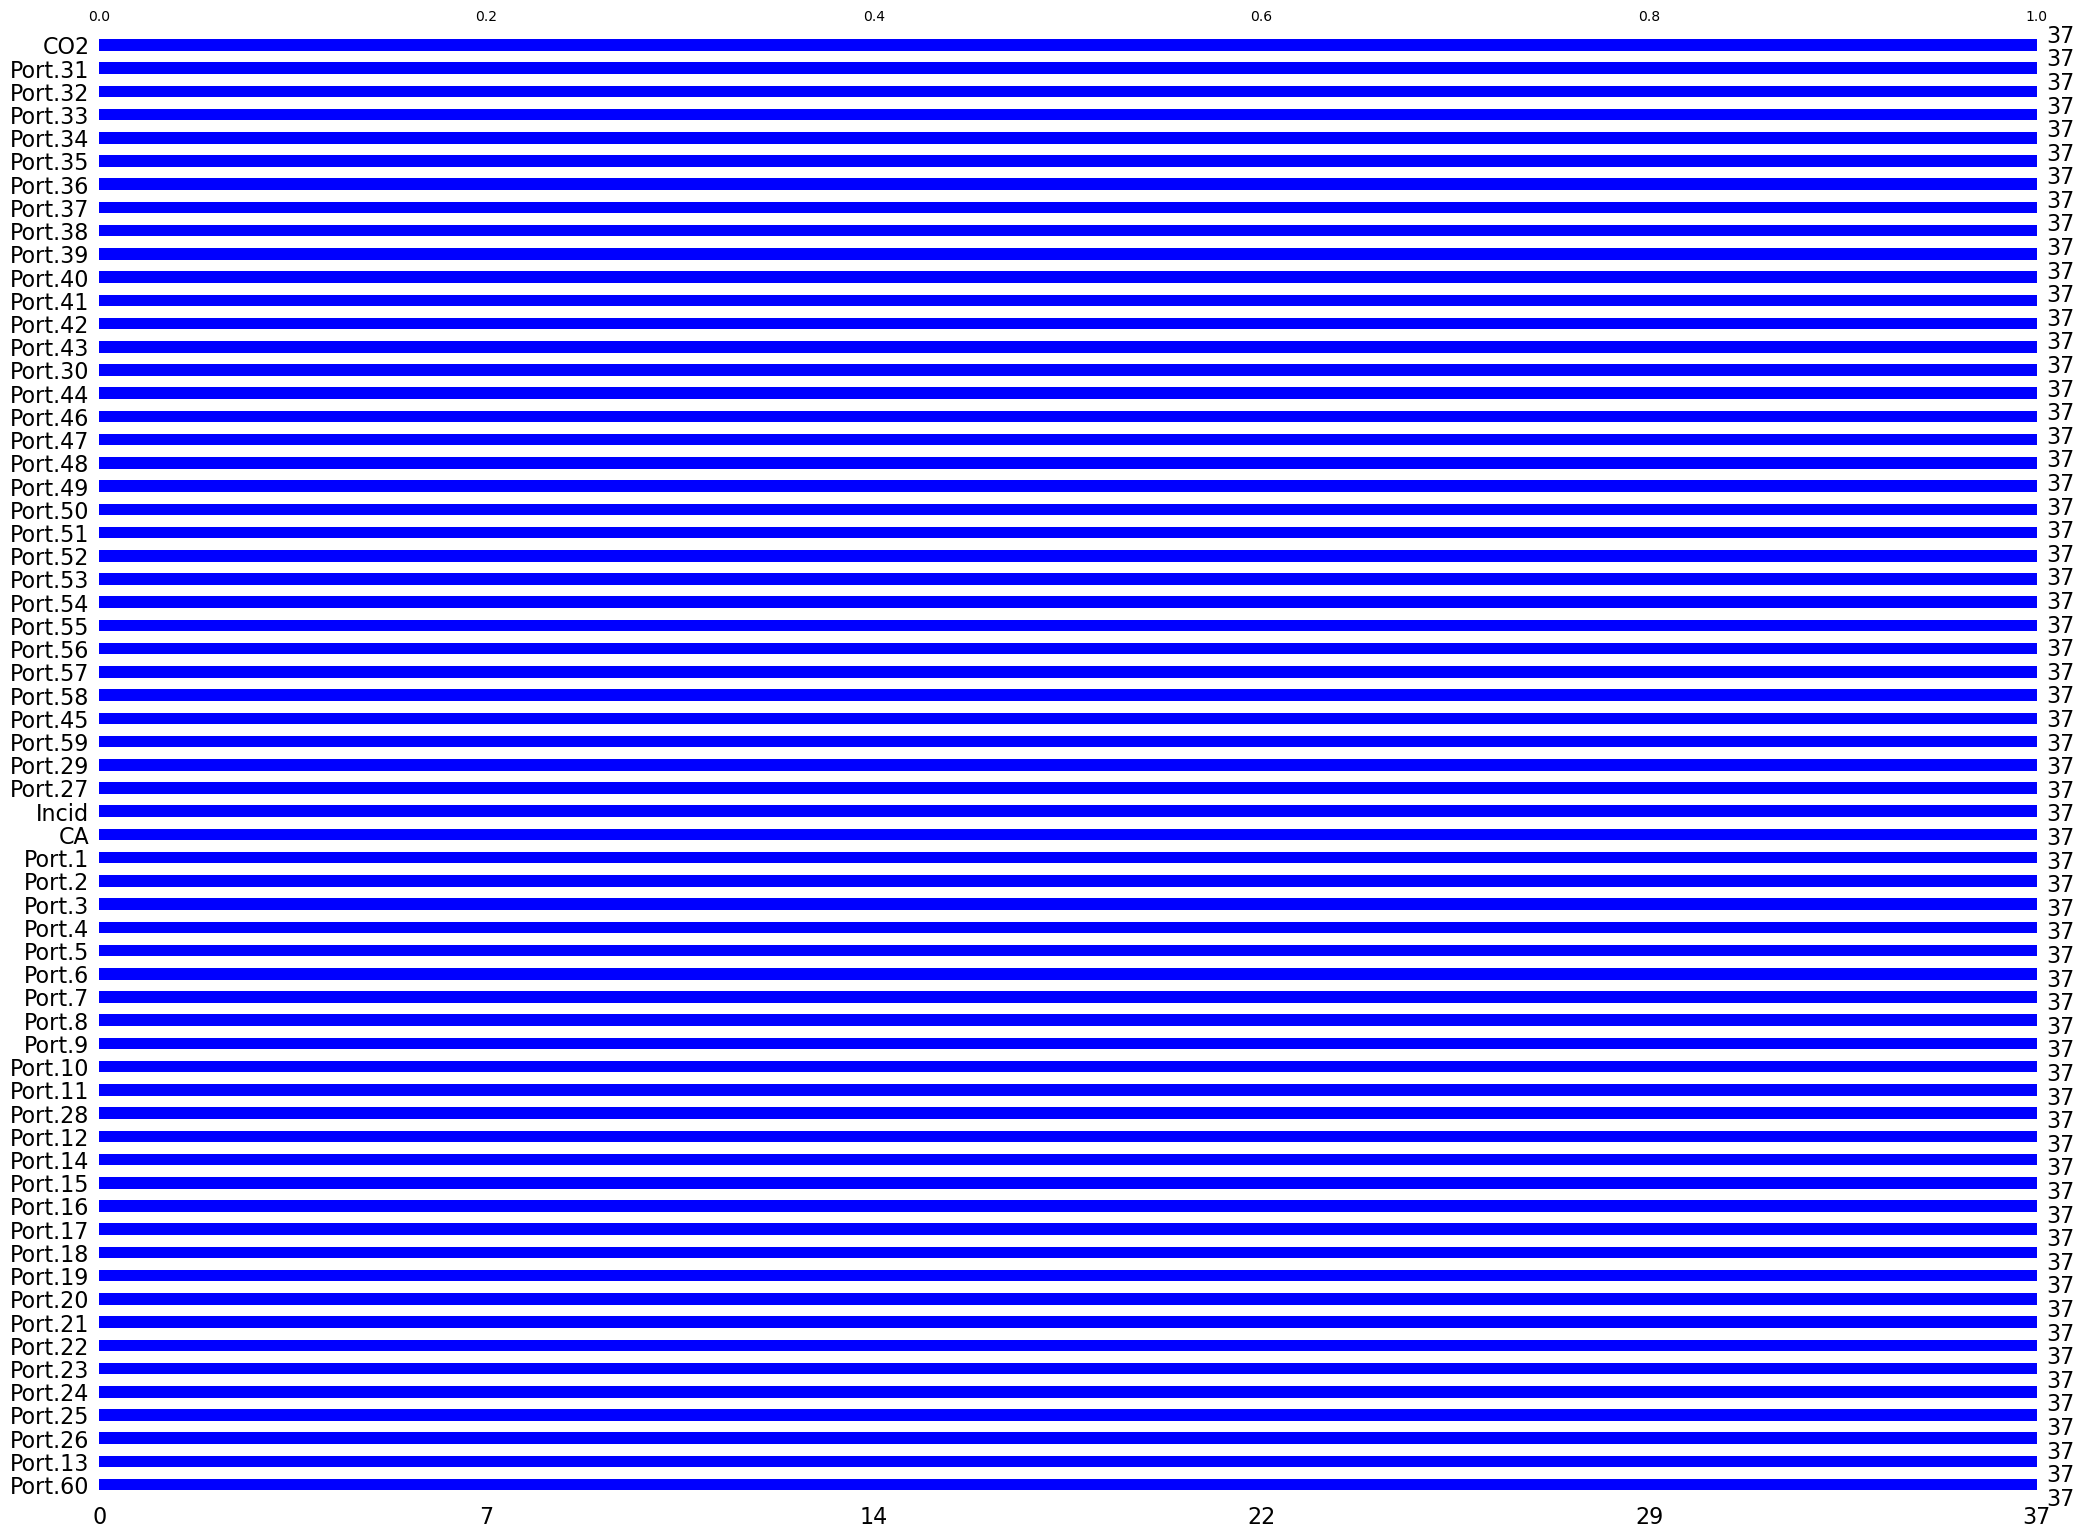

In [7]:
msno.bar(transp, color="Blue", sort="descending")

La base de données ne contient aucune variable qui contient des valeurs manquantes. 

## 1.4 Visualisation de la variable CO2

count    37.000000
mean      7.464595
std       1.309603
min       4.970000
25%       6.710000
50%       7.410000
75%       8.290000
max      10.550000
Name: CO2, dtype: float64


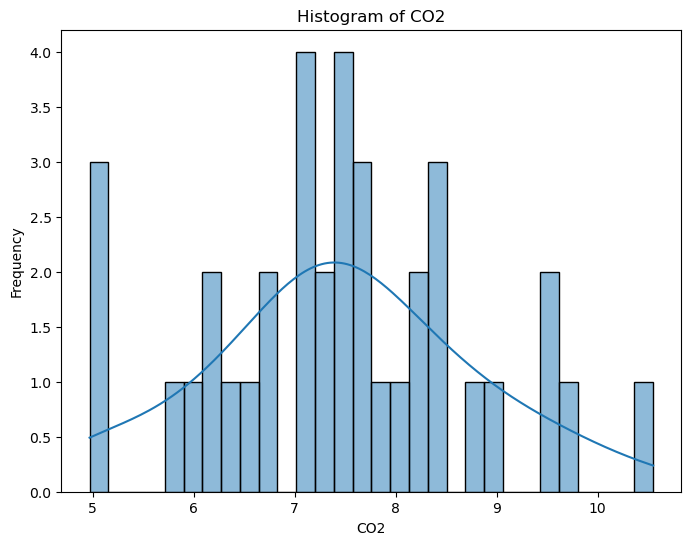

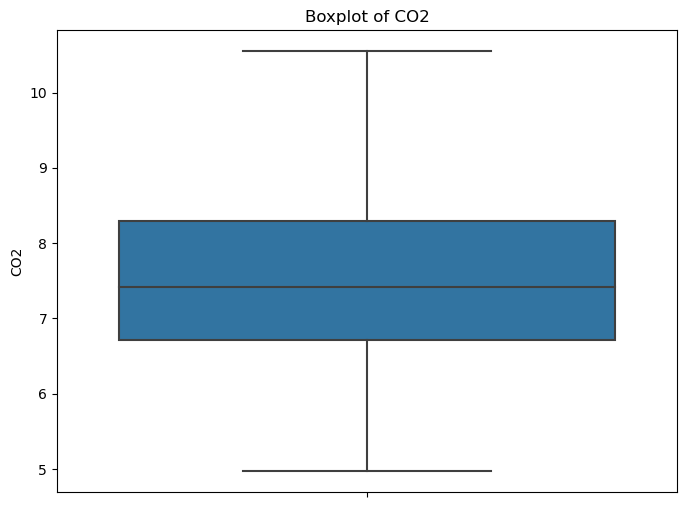

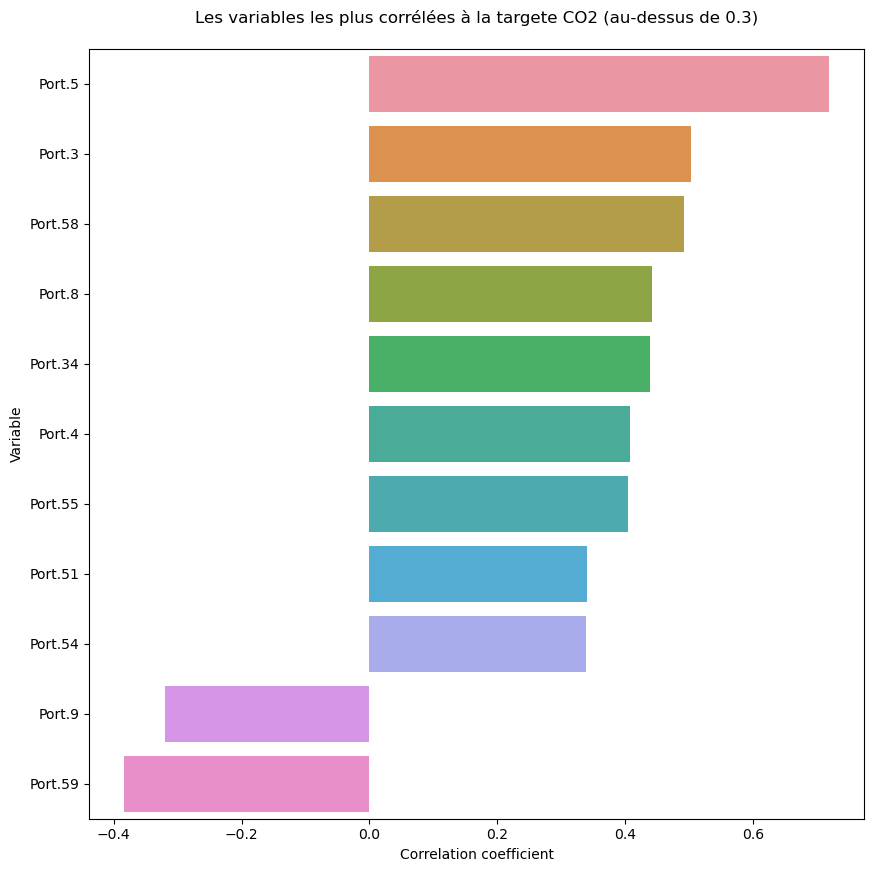

In [8]:
print(transp['CO2'].describe())

# Histogramme
plt.figure(figsize=(8, 6))
sns.histplot(transp['CO2'], bins=30, kde=True)
plt.title('Histogram of CO2')
plt.xlabel('CO2')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=transp['CO2'])
plt.title('Boxplot of CO2')


# corrélation avec les variables explicatives
correlation_with_CO2 = transp.iloc[:, 3:64].corrwith(transp['CO2']).sort_values(ascending=False)

# Filtrer les corrélations supérieures à un seuil spécifique
strong_corr_with_CO2 = correlation_with_CO2[correlation_with_CO2.abs() > 0.3]

# Visualiser les corrélations dans un barplot
plt.figure(figsize=(10, 10))
sns.barplot(x=strong_corr_with_CO2.values, y=strong_corr_with_CO2.index)
plt.title('Les variables les plus corrélées à la targete CO2 (au-dessus de 0.3)\n')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()


## 1.5 Visualisation de la variable Incid

count     37.000000
mean      34.702703
std       32.412159
min        3.000000
25%       13.000000
50%       27.000000
75%       42.000000
max      152.000000
Name: Incid, dtype: float64
Incid
5      2
15     2
8      2
13     2
87     2
29     2
27     2
34     2
85     1
33     1
17     1
69     1
63     1
53     1
42     1
12     1
48     1
11     1
4      1
40     1
31     1
18     1
26     1
16     1
94     1
3      1
22     1
9      1
152    1
Name: count, dtype: int64


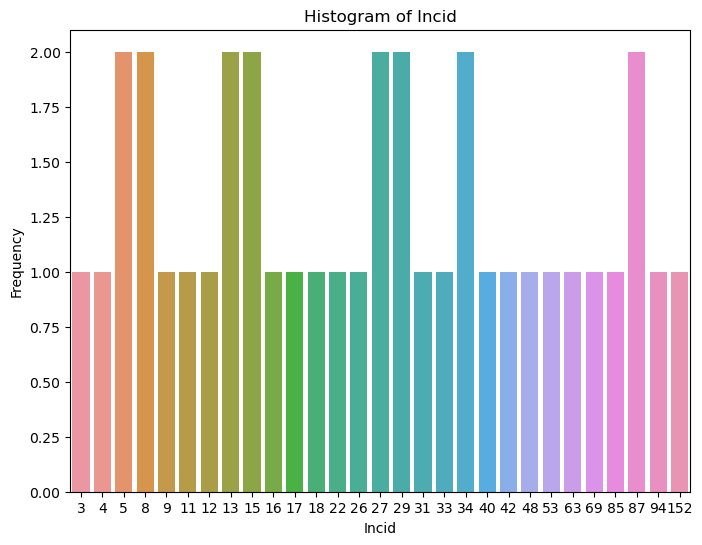

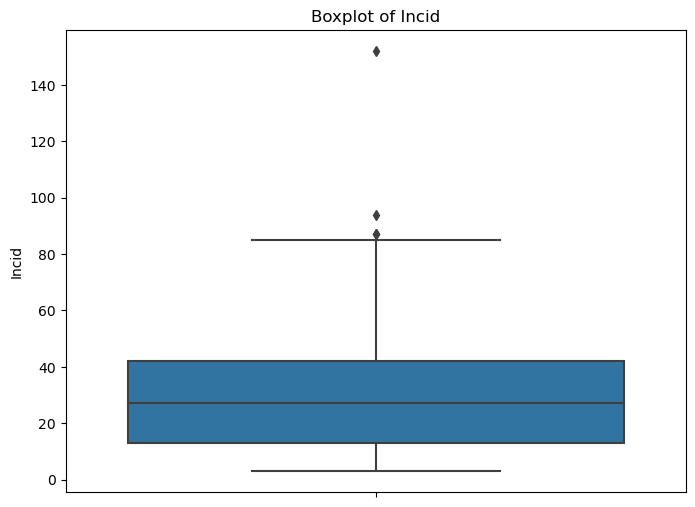

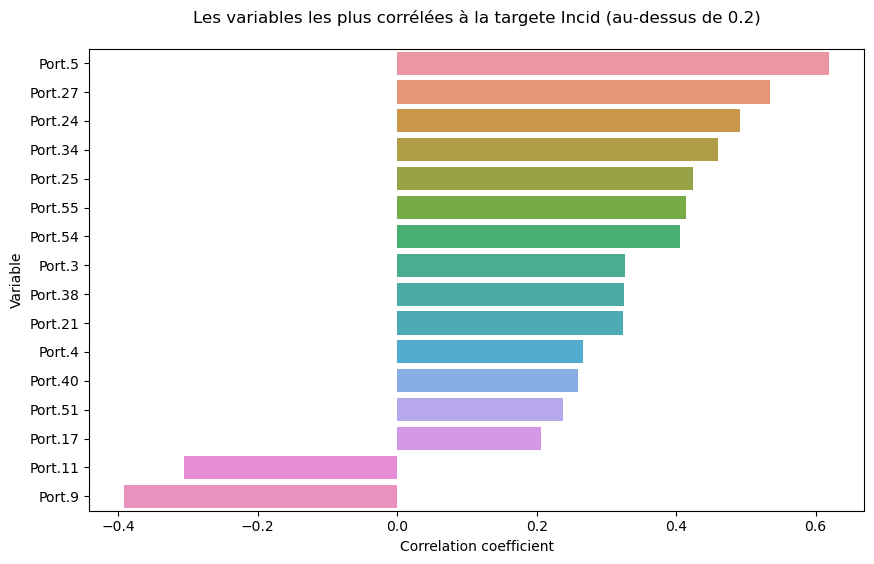

In [9]:
print(transp['Incid'].describe())
print(transp['Incid'].value_counts())

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# print(transp["Incid"].value_counts())

# Histogramme
plt.figure(figsize=(8, 6))
sns.countplot(x='Incid', data=transp)
plt.title('Histogram of Incid')
plt.xlabel('Incid')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='Incid', data=transp)
plt.title('Boxplot of Incid')
plt.ylabel('Incid')
plt.show()

# Correlation barplot
correlation_with_incid = transp.iloc[:,3:60].corrwith(transp['Incid']).sort_values(ascending=False)

# Filtrer les corrélations supérieures à un seuil spécifique
strong_corr_with_incid = correlation_with_incid[correlation_with_incid.abs() > 0.2]

plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr_with_incid.values, y=strong_corr_with_incid.index)
plt.title('Les variables les plus corrélées à la targete Incid (au-dessus de 0.2)\n')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()


##  1.6  Visualisation de la variable CA (Chiffre d'affaires en 2 classes)

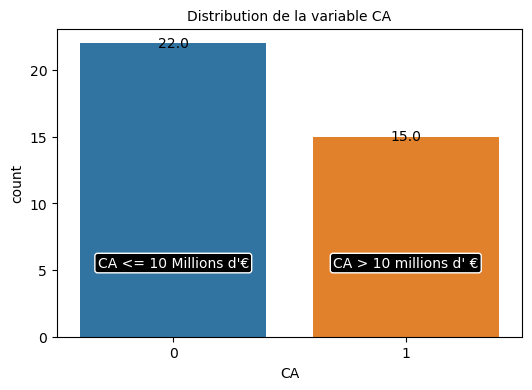

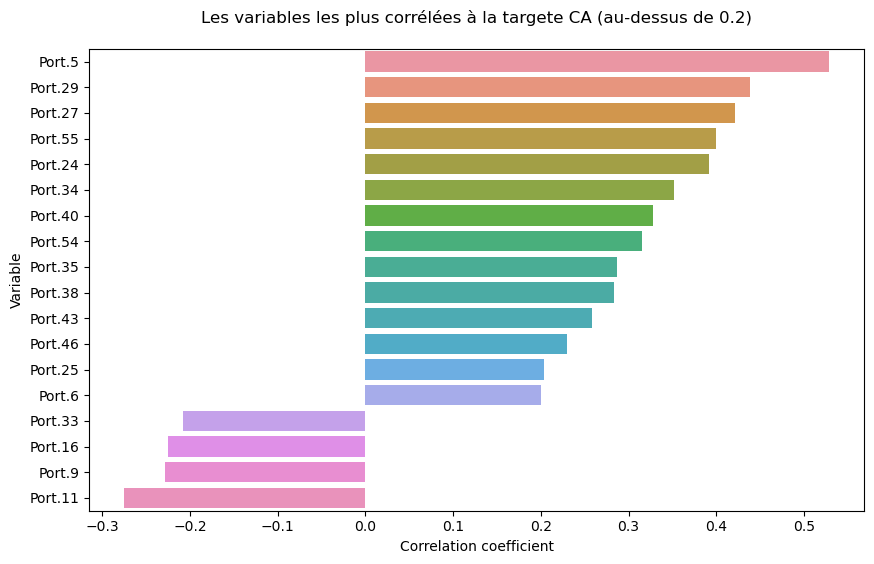

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x="CA", data=transp)
plt.title("Distribution de la variable CA", fontsize=10)



# Obtenir les hauteurs des barres
bars = plt.gca().patches

# Pour chaque barre
for bar in bars:
    # Obtenir la hauteur de la barre (nombre de cas)
    bar_height = bar.get_height()
    # Ajouter un texte au-dessus de la barre
    plt.text(bar.get_x() + bar.get_width() / 2, bar_height ,  # Déplacer le texte vers le haut
             f'{bar_height}', 
             va='center', ha='center', color='black', fontsize=10)
    
# Ajouter un texte spécifique pour chaque barre
plt.text(bars[0].get_x() + bars[0].get_width() / 2, 5,  # Déplacer le texte vers le bas
         "CA <= 10 Millions d'€", 
         va='bottom', ha='center', color='white', fontsize=10,
         bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.2'))
plt.text(bars[1].get_x() + bars[1].get_width() / 2, 5,  # Déplacer le texte vers le bas
         "CA > 10 millions d' €", 
         va='bottom', ha='center', color='white', fontsize=10,
         bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.2'))





# Afficher le graphique
plt.show()


# Correlation barplot
correlation_with_CA = transp.iloc[:,3:60].corrwith(transp['CA']).sort_values(ascending=False)

# Filtrer les corrélations supérieures à un seuil spécifique
strong_corr_with_CA = correlation_with_CA[correlation_with_CA.abs() > 0.2]

plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr_with_CA.values, y=strong_corr_with_CA.index)
plt.title('Les variables les plus corrélées à la targete CA (au-dessus de 0.2)\n')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()

## 1.7 Visualisation de la variable CA3 (chiffre d'affaires en 3 classes)

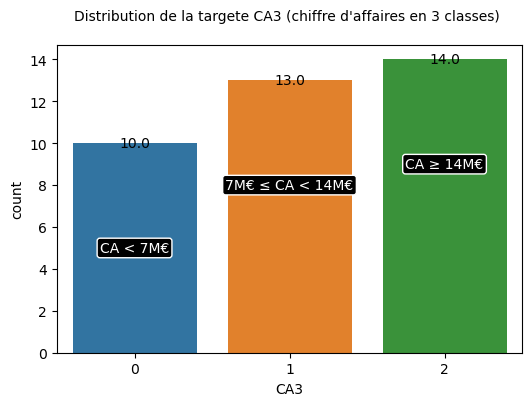

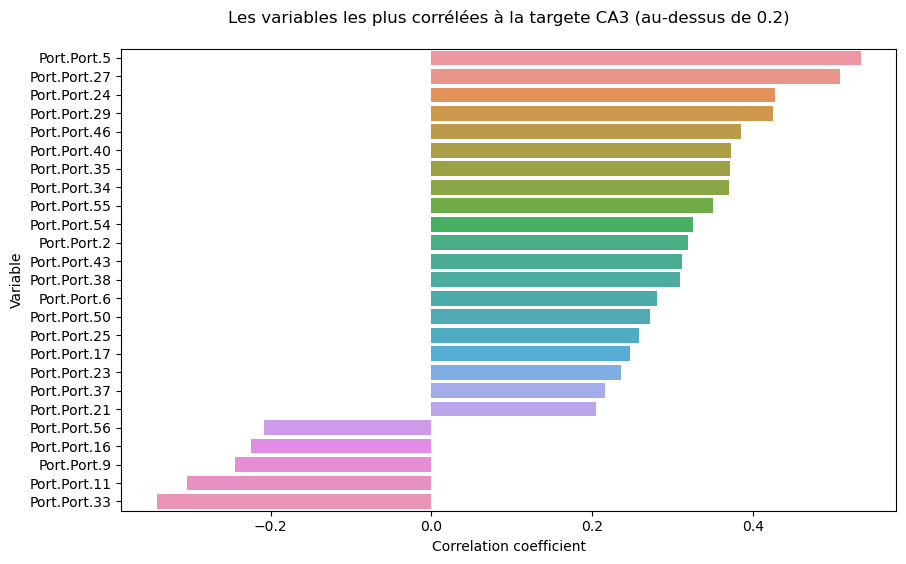

In [11]:
# Importation des données
transp = pd.read_csv("Data/transportmod3.txt", sep=" ", quotechar='"', skipinitialspace=True)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x="CA3", data=transp)
plt.title("Distribution de la targete CA3 (chiffre d'affaires en 3 classes) \n", fontsize=10)


# Obtenir les hauteurs des barres
bars = plt.gca().patches

# Pour chaque barre
for bar in bars:
    # Obtenir la hauteur de la barre (nombre de cas)
    bar_height = bar.get_height()
    # Ajouter un texte au-dessus de la barre
    plt.text(bar.get_x() + bar.get_width() / 2, bar_height,  # Déplacer le texte vers le haut
             f'{bar_height}', 
             va='center', ha='center', color='black', fontsize=10)

# Ajouter un texte spécifique pour chaque barre
plt.text(bars[0].get_x() + bars[0].get_width() / 2, bars[0].get_height() -5,  # Ajuster la position du texte
         "CA < 7M€", 
         va='center', ha='center', color='white', fontsize=10,
         bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.2'))

plt.text(bars[1].get_x() + bars[1].get_width() / 2, bars[1].get_height() -5,  # Ajuster la position du texte
         "7M€ ≤ CA < 14M€", 
         va='center', ha='center', color='white', fontsize=10,
         bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.2'))

plt.text(bars[2].get_x() + bars[2].get_width() / 2, bars[2].get_height() - 5,  # Ajuster la position du texte
         "CA ≥ 14M€", 
         va='center', ha='center', color='white', fontsize=10,
         bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.2'))

# Afficher le graphique
plt.show()


# Correlation barplot
correlation_with_CA3 = transp.iloc[:,4:60].corrwith(transp['CA3']).sort_values(ascending=False)

# Filtrer les corrélations supérieures à un seuil spécifique
strong_corr_with_CA3 = correlation_with_CA3[correlation_with_CA3.abs() > 0.2]

plt.figure(figsize=(10, 6))
sns.barplot(x=strong_corr_with_CA3.values, y=strong_corr_with_CA3.index)
plt.title('Les variables les plus corrélées à la targete CA3 (au-dessus de 0.2)\n')
plt.xlabel('Correlation coefficient')
plt.ylabel('Variable')
plt.show()

## 1.8 corrélation entre les variables explicatives 

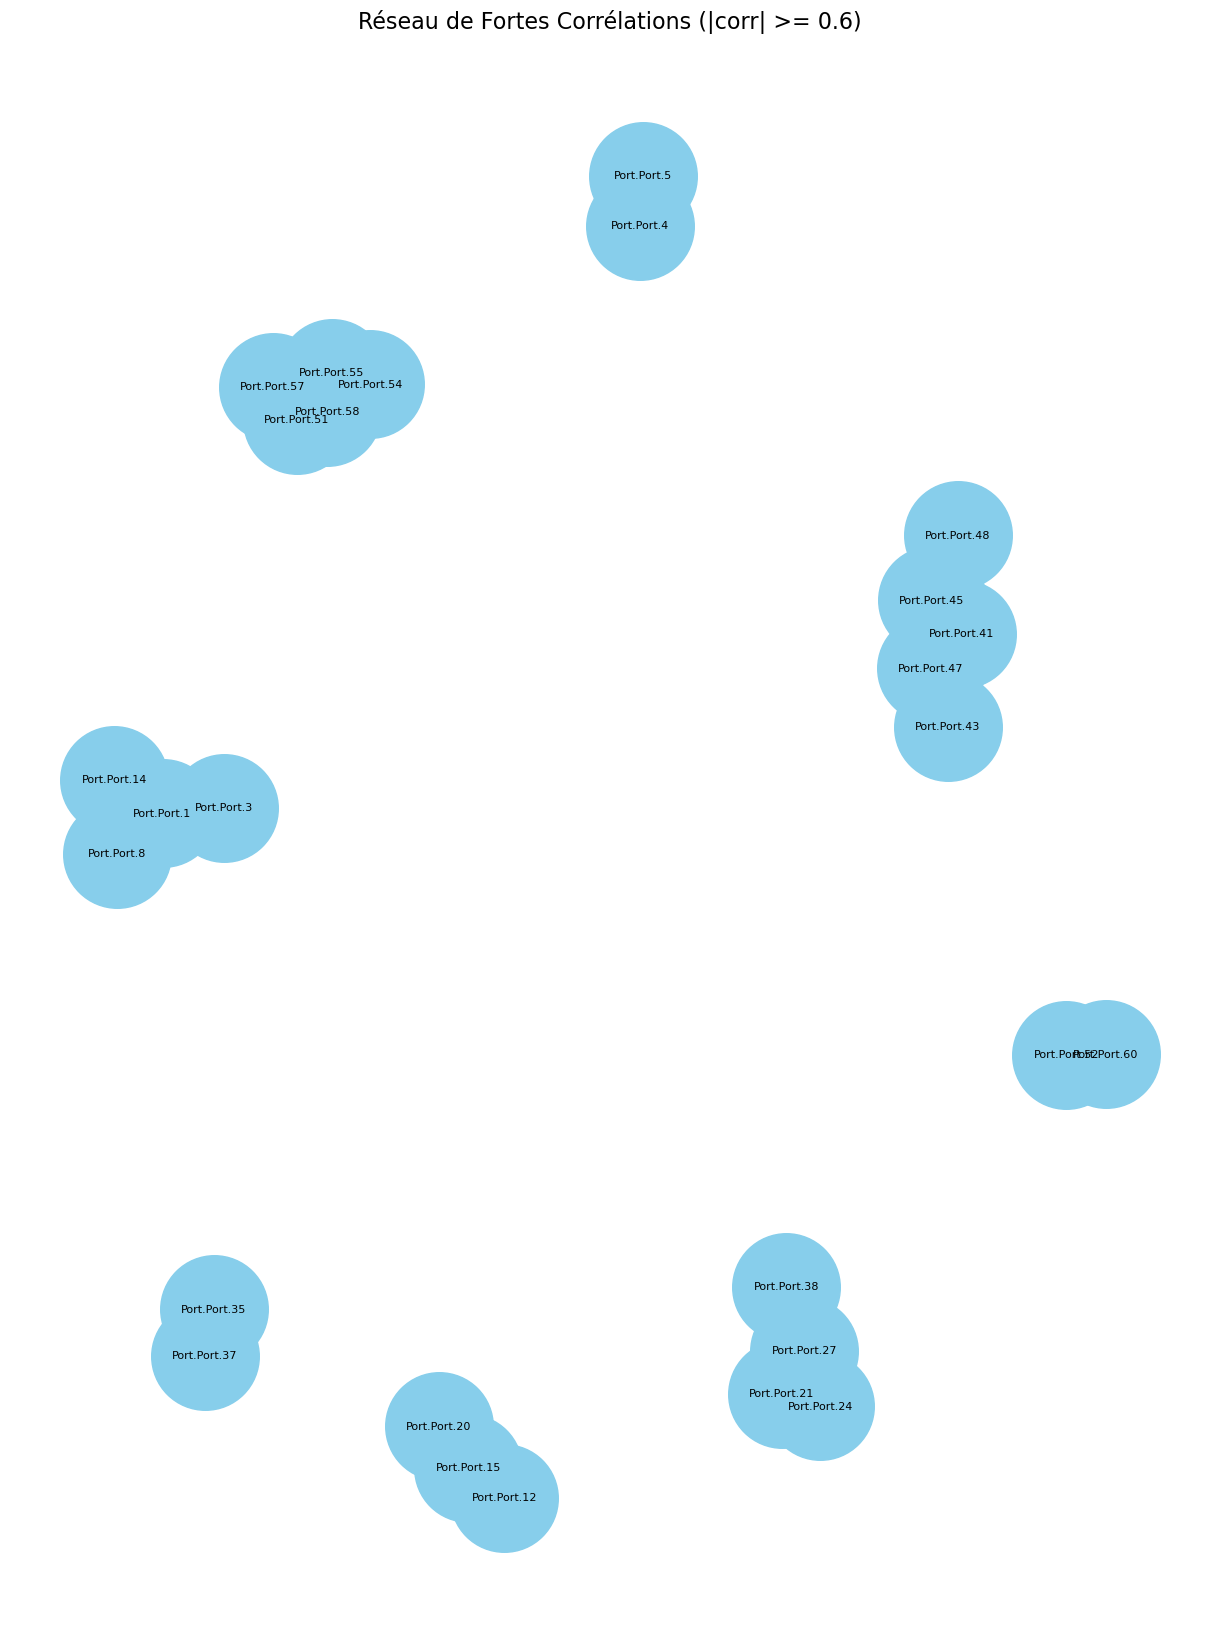

In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Calculer la matrice de corrélation
corr_matrix = transp.iloc[:, 3:64].corr()

# Filtrer la matrice de corrélation pour obtenir des corrélations fortes
strong_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.6].stack().reset_index()
strong_corr_matrix = strong_corr_matrix[strong_corr_matrix['level_0'] != strong_corr_matrix['level_1']]

# Créer un graphique à partir des corrélations fortes
G = nx.from_pandas_edgelist(strong_corr_matrix, 'level_0', 'level_1')

# Dessiner le réseau
plt.figure(figsize=(12, 16))
pos = nx.spring_layout(G, seed=42)  # Positionnement des nœuds
nx.draw(G, with_labels=True, node_size=6000, node_color="skyblue", pos=pos, font_size=8, width=0.5, edge_color="gray")
plt.title("Réseau de Fortes Corrélations (|corr| >= 0.6)", fontsize=16)
plt.show()



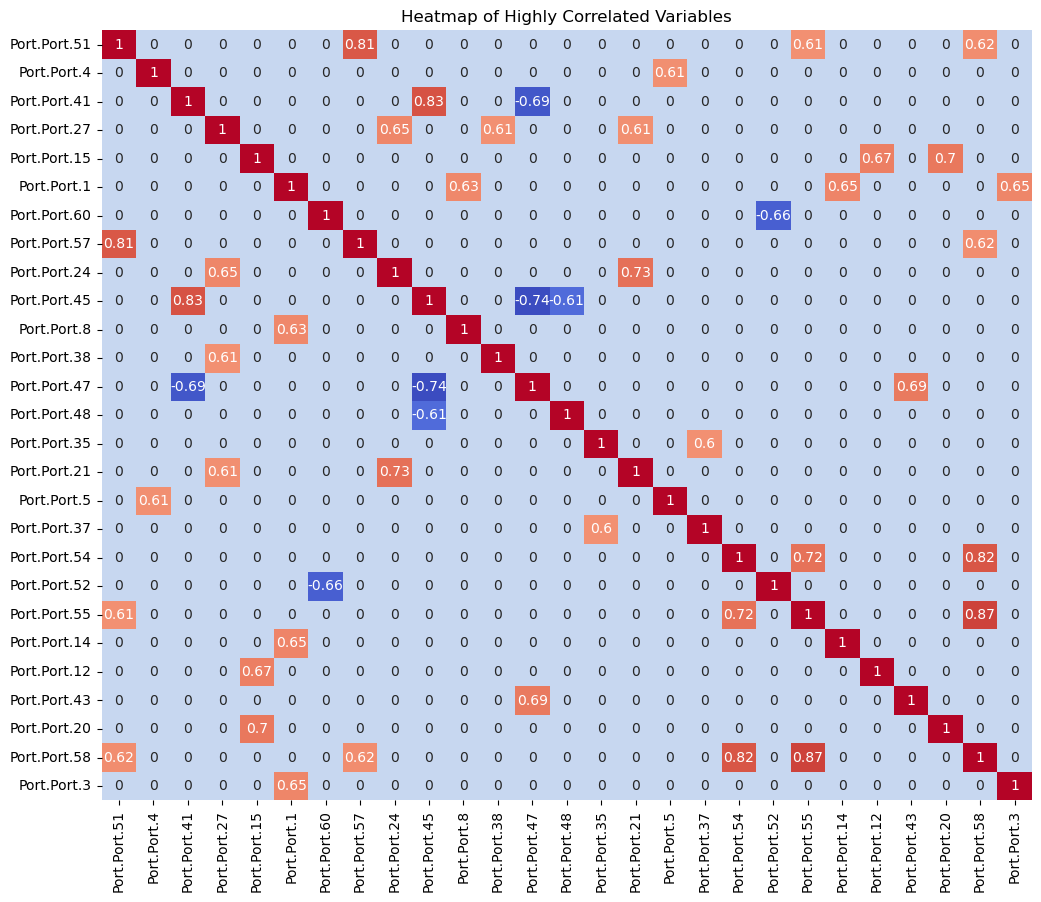

Highly correlated variable pairs:
Port.Port.1 and Port.Port.3: 0.65
Port.Port.1 and Port.Port.8: 0.63
Port.Port.1 and Port.Port.14: 0.65
Port.Port.4 and Port.Port.5: 0.61
Port.Port.12 and Port.Port.15: 0.67
Port.Port.15 and Port.Port.20: 0.70
Port.Port.21 and Port.Port.24: 0.73
Port.Port.21 and Port.Port.27: 0.61
Port.Port.24 and Port.Port.27: 0.65
Port.Port.27 and Port.Port.38: 0.61
Port.Port.35 and Port.Port.37: 0.60
Port.Port.41 and Port.Port.45: 0.83
Port.Port.41 and Port.Port.47: -0.69
Port.Port.43 and Port.Port.47: 0.69
Port.Port.45 and Port.Port.47: -0.74
Port.Port.45 and Port.Port.48: -0.61
Port.Port.51 and Port.Port.55: 0.61
Port.Port.51 and Port.Port.57: 0.81
Port.Port.51 and Port.Port.58: 0.62
Port.Port.52 and Port.Port.60: -0.66
Port.Port.54 and Port.Port.55: 0.72
Port.Port.54 and Port.Port.58: 0.82
Port.Port.55 and Port.Port.58: 0.87
Port.Port.57 and Port.Port.58: 0.62


In [13]:
import numpy as np

# Extraire les paires de variables avec une corrélation supérieure à un certain seuil
threshold = 0.6
high_corr_var_pairs = {}
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_var_pairs[(corr_matrix.columns[i], corr_matrix.columns[j])] = corr_matrix.iloc[i, j]

# Extraire les variables uniques des paires fortement corrélées
highly_corr_vars = list(set(var for pair in high_corr_var_pairs.keys() for var in pair))

# Création d'une nouvelle matrice de corrélation pour les variables fortement corrélées uniquement
filtered_corr_matrix = np.zeros((len(highly_corr_vars), len(highly_corr_vars)))

# Remplir la matrice filtrée avec les valeurs de corrélation correspondantes
for i, var1 in enumerate(highly_corr_vars):
    for j, var2 in enumerate(highly_corr_vars):
        if var1 == var2:
            filtered_corr_matrix[i, j] = 1
        elif (var1, var2) in high_corr_var_pairs:
            filtered_corr_matrix[i, j] = high_corr_var_pairs[(var1, var2)]
        elif (var2, var1) in high_corr_var_pairs:
            filtered_corr_matrix[i, j] = high_corr_var_pairs[(var2, var1)]

# Convertir la matrice filtrée en DataFrame pour une meilleure visualisation
filtered_corr_df = pd.DataFrame(filtered_corr_matrix, index=highly_corr_vars, columns=highly_corr_vars)

# Créer une heatmap pour les variables sélectionnées
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr_df, annot=True, cmap='coolwarm', cbar=False)
plt.title('Heatmap of Highly Correlated Variables')
plt.show()

# Afficher les paires de variables et leur corrélation
print("Highly correlated variable pairs:")
for pair, corr in high_corr_var_pairs.items():
    print(f"{pair[0]} and {pair[1]}: {corr:.2f}")



In [14]:
import pandas as pd

# Création d'un DataFrame à partir de vos données
data = {
    'Pair': ['Port.Port.1 and Port.Port.3', 'Port.Port.1 and Port.Port.8', 'Port.Port.1 and Port.Port.14',
             'Port.Port.4 and Port.Port.5', 'Port.Port.12 and Port.Port.15', 'Port.Port.15 and Port.Port.20',
             'Port.Port.21 and Port.Port.24', 'Port.Port.21 and Port.Port.27', 'Port.Port.24 and Port.Port.27',
             'Port.Port.27 and Port.Port.38', 'Port.Port.35 and Port.Port.37', 'Port.Port.41 and Port.Port.45',
             'Port.Port.41 and Port.Port.47', 'Port.Port.43 and Port.Port.47', 'Port.Port.45 and Port.Port.47',
             'Port.Port.45 and Port.Port.48', 'Port.Port.51 and Port.Port.55', 'Port.Port.51 and Port.Port.57',
             'Port.Port.51 and Port.Port.58', 'Port.Port.52 and Port.Port.60', 'Port.Port.54 and Port.Port.55',
             'Port.Port.54 and Port.Port.58', 'Port.Port.55 and Port.Port.58', 'Port.Port.57 and Port.Port.58'],
    'Correlation': [0.65, 0.63, 0.65, 0.61, 0.67, 0.70, 0.73, 0.61, 0.65, 0.61, 0.60, 0.83, -0.69, 0.69, -0.74,
                    -0.61, 0.61, 0.81, 0.62, -0.66, 0.72, 0.82, 0.87, 0.62]
}

df = pd.DataFrame(data)

# Appliquer un gradient de couleur à la colonne de corrélation
styled_df = df.style.background_gradient(cmap='coolwarm', subset=['Correlation'])

# Afficher le DataFrame stylisé
styled_df


,Pair,Correlation
0,Port.Port.1 and Port.Port.3,0.650000
1,Port.Port.1 and Port.Port.8,0.630000
2,Port.Port.1 and Port.Port.14,0.650000
3,Port.Port.4 and Port.Port.5,0.610000
4,Port.Port.12 and Port.Port.15,0.670000
5,Port.Port.15 and Port.Port.20,0.700000
6,Port.Port.21 and Port.Port.24,0.730000
7,Port.Port.21 and Port.Port.27,0.610000
8,Port.Port.24 and Port.Port.27,0.650000
9,Port.Port.27 and Port.Port.38,0.610000


# Exercice I : Modélisation du CO2

### *1/ RIDGE

La régression Ridge est utile lorsqu'il y a multicollinéarité entre les prédicteurs. Elle ajoute une pénalité L2 (somme des carrés des coefficients) au modèle linéaire ordinaire, permettant ainsi de réduire la complexité du modèle en diminuant les coefficients des prédicteurs. Le paramètre de régularisation 
�
λ contrôle la force de la pénalité : un 
�
λ plus élevé réduit davantage les coefficients.

### Étapes :

Normaliser les prédicteurs pour qu'ils soient à la même échelle.

Sélectionner le λ optimal via une validation croisée.

Entraîner le modèle Ridge avec le λ optimal.

Sélectionner des variables en fonction des coefficients.

### Inconvénients :

Ne réalise pas de sélection de variables (tous les prédicteurs sont inclus dans le modèle).
L'interprétation peut être moins intuitive qu'un modèle linéaire ordinaire.
Code :
Nous allons commencer par la régression Ridge, en normalisant les prédicteurs, en sélectionnant 
�
λ via une validation croisée, et en entraînant le modèle. Ensuite, nous discuterons de la sélection des variables.

In [15]:
## split des données 
y = transp["CO2"]
X = transp.iloc[:, 3:64]

In [16]:
print(f'taille de la variable à expliquer (CO2) est de {y.shape[0]} observations')
print(f'Les variables explicatives sont au nombre de {X.shape[1]} et avec {transp.shape[0]}')

taille de la variable à expliquer (CO2) est de 37 observations
Les variables explicatives sont au nombre de 61 et avec 37


# Normalisation de nos variables explicatives 

In [17]:
# Initialisation de standaeScaler
scaler = StandardScaler()
# on ajuste le scaler aux donnée et tranformer X 
X_stand = scaler.fit_transform(X)
# On converti le résultat en dataFrame pour conserver les noms de colonnes et l'index 
X_stand = pd.DataFrame(X_stand, columns=X.columns, index=X.index)

In [18]:
X_stand.head(5)

,CA3,Port.Port.1,Port.Port.2,Port.Port.3,Port.Port.4,Port.Port.5,Port.Port.6,Port.Port.7,Port.Port.8,Port.Port.9,...,Port.Port.51,Port.Port.52,Port.Port.53,Port.Port.54,Port.Port.55,Port.Port.56,Port.Port.57,Port.Port.58,Port.Port.59,Port.Port.60
1,-1.388435,0.332294,-1.295769,-1.266123,-1.566592,-1.201870,-1.294196,0.322048,0.249318,1.685895,...,0.583383,0.251104,-0.705690,0.589384,-0.077245,0.419527,-0.061580,0.148827,0.558083,-0.855636
2,-0.135457,0.257855,-0.190953,0.651343,-1.439190,-1.678067,-1.033927,-1.440239,0.895241,0.462381,...,-1.083843,-0.113731,-0.434390,0.728704,-0.262600,-0.656995,-0.542807,0.255925,1.284373,-0.004247
3,-1.388435,0.658999,-0.441625,0.304746,0.130734,-1.274021,0.957136,-0.111746,-0.064236,0.383274,...,-1.373292,-1.593797,0.449389,-2.175013,-1.291020,0.763856,-1.384136,-2.335245,0.510845,0.909261
4,-0.135457,1.490236,0.458939,0.237662,-1.163837,-0.942125,-0.522063,0.477943,0.355927,1.327279,...,-1.651163,-1.871569,0.067103,-1.566406,-0.154974,-0.273088,-0.984750,-1.005448,0.008937,1.819115
5,1.117521,0.017995,0.375382,-0.176018,1.593805,0.717352,0.549380,0.200043,-0.101863,-2.005741,...,0.822661,-0.122022,-0.483718,-0.011891,0.616341,0.154354,1.755297,0.886611,1.278468,0.540204


# RIDGE

Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Best lambda in this iteration: 65.89999999999999
Average lambda: 65.89999999999999


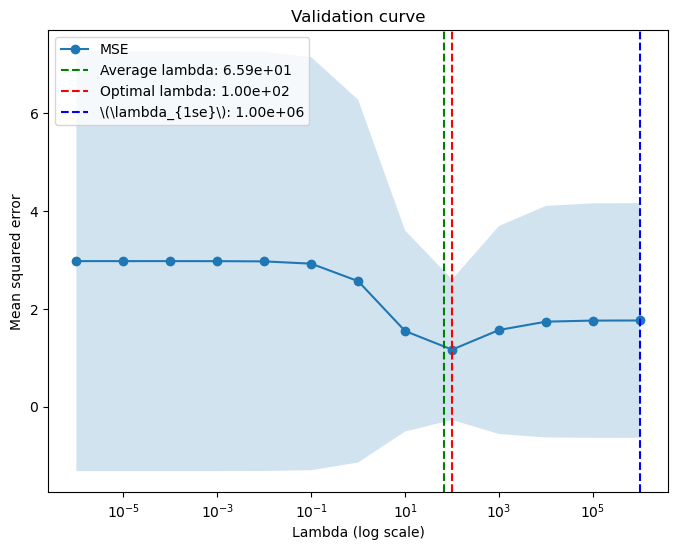

Optimal lambda: 1.00e+02
\(\lambda_{1se}\): 1.00e+06


In [19]:
from sklearn.linear_model import RidgeCV
import numpy as np
import matplotlib.pyplot as plt

# Suppose that X_stand and y are your standardized independent and dependent variables respectively
# ...

# Part 1: Stabilizing lambda
lambda_sum = 0

# Loop to stabilize lambda
for _ in range(10):
    # Define a range for lambda to explore
    lambdas = np.linspace(0.1, 100, 1000)
    
    # Use RidgeCV to perform cross-validation
    ridge = RidgeCV(alphas=lambdas, store_cv_values=True)
    ridge.fit(X_stand, y)
    
    print("Best lambda in this iteration:", ridge.alpha_)
    lambda_sum += ridge.alpha_

# Calculate the average of lambda over all iterations
lambda_avg = lambda_sum / 10
print("Average lambda:", lambda_avg)

# Part 2: Plot the validation curve
lambdas = np.logspace(-6, 6, 13)
ridge_cv = RidgeCV(alphas=lambdas, store_cv_values=True)
ridge_cv.fit(X_stand, y)

# Retrieve the cross-validation scores for each lambda
mse_mean = np.mean(ridge_cv.cv_values_, axis=0)
mse_std = np.std(ridge_cv.cv_values_, axis=0)

# Find the lambda that minimizes the cross-validation error
min_mse_idx = np.argmin(mse_mean)
optimal_lambda = lambdas[min_mse_idx]

# Find the largest lambda within one standard error of the minimum
cutoff_mse = mse_mean[min_mse_idx] + mse_std[min_mse_idx]
one_std_idx = np.where(mse_mean <= cutoff_mse)[0][-1]
lambda_1se = lambdas[one_std_idx]

# Plot the scores as a function of lambda
plt.figure(figsize=(8, 6))
plt.plot(lambdas, mse_mean, marker='o', label='MSE')
plt.axvline(x=lambda_avg, color='g', linestyle='--', label=f'Average lambda: {lambda_avg:.2e}')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal lambda: {optimal_lambda:.2e}')
plt.axvline(x=lambda_1se, color='b', linestyle='--', label=f'\(\lambda_{{1se}}\): {lambda_1se:.2e}')
plt.fill_between(lambdas, mse_mean + mse_std, mse_mean - mse_std, alpha=0.2)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean squared error')
plt.title('Validation curve')
plt.legend()
plt.show()

print(f"Optimal lambda: {optimal_lambda:.2e}")
print(f"\(\lambda_{{1se}}\): {lambda_1se:.2e}")


## Étape 2: Modèle avec le meilleur alpha et analyse des variables

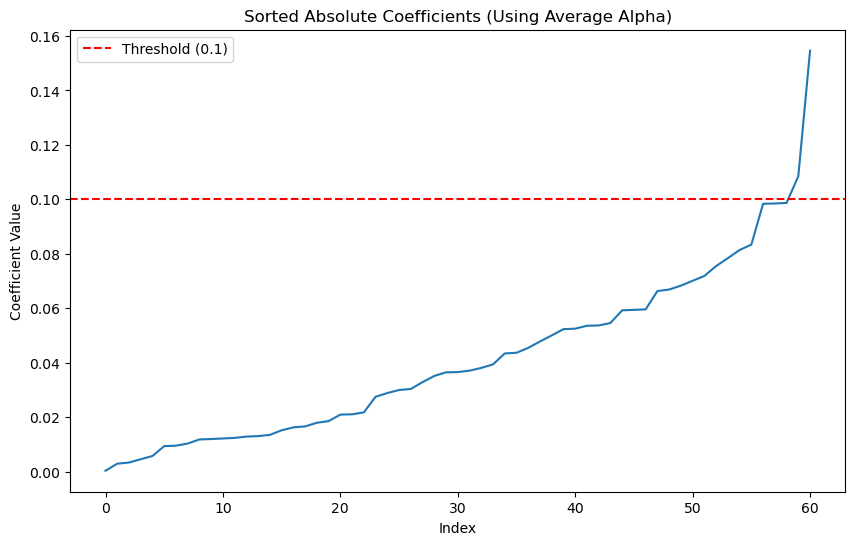

Indices of large coefficients (Using Average Alpha): [3 5]


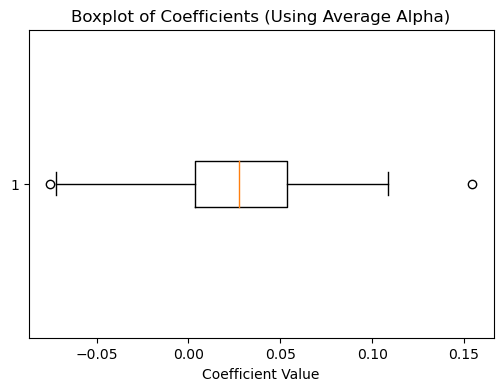

In [20]:
# Ajuster un modèle Ridge avec l'alpha moyen trouvé précédemment (lambda_avg)/(optimal_alpha)
ridge_final_avg = Ridge(alpha=lambda_avg)   # solver="cholesky" optimal_lambda
ridge_final_avg.fit(X_stand, y)

# Extraire les coefficients
coef_avg = ridge_final_avg.coef_

# Tracer les coefficients triés
plt.figure(figsize=(10, 6))
plt.plot(np.sort(np.abs(coef_avg)))
plt.title('Sorted Absolute Coefficients (Using Average Alpha)')
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.axhline(y=0.1, color='r', linestyle='--', label="Threshold (0.1)")
plt.legend()
plt.show()

# Identifier les coefficients dont la valeur absolue est supérieure à un seuil (par exemple, 0.1)
large_coef_idx_avg = np.where(np.abs(coef_avg) > 0.1)[0]
print("Indices of large coefficients (Using Average Alpha):", large_coef_idx_avg)

# Créer un boxplot des coefficients
plt.figure(figsize=(6, 4))
plt.boxplot(coef_avg, vert=False)
plt.title('Boxplot of Coefficients (Using Average Alpha)')
plt.xlabel('Coefficient Value')
plt.show()


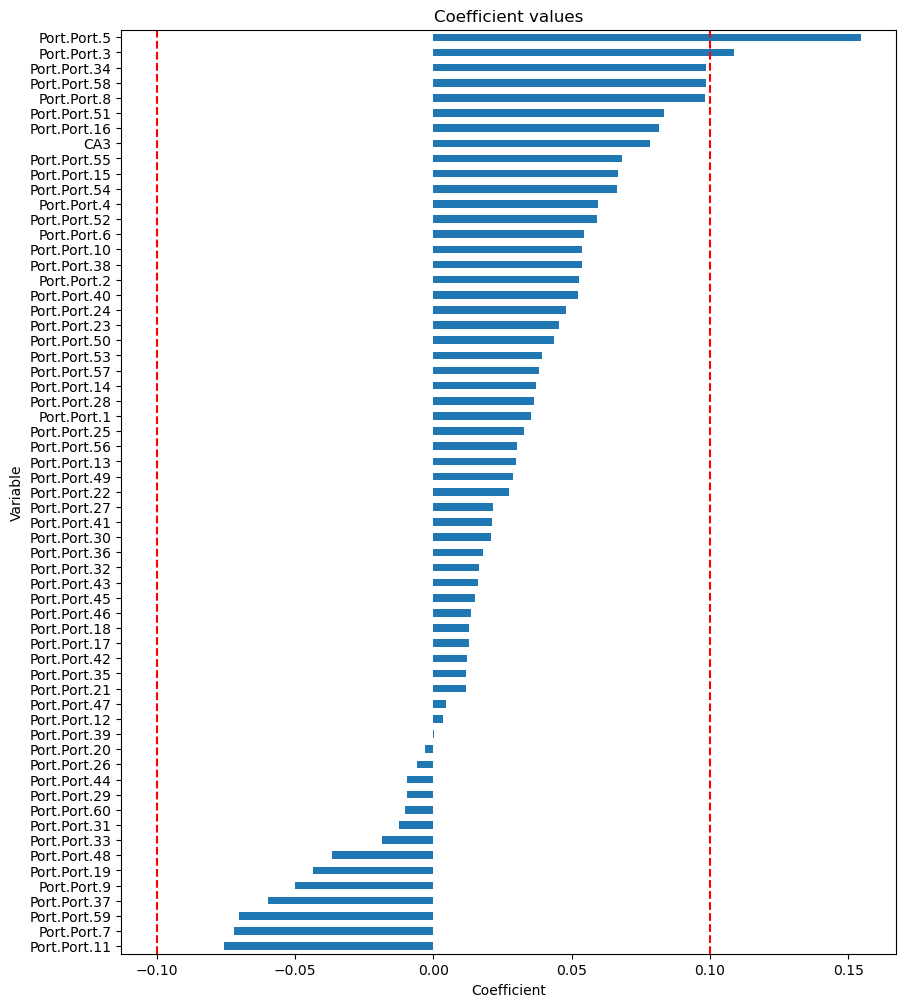

Selected variables:
Port.Port.3    0.108515
Port.Port.5    0.154585
dtype: float64
['Port.Port.3', 'Port.Port.5']


In [21]:
import matplotlib.pyplot as plt

# Supposons que X et y sont vos variables indépendantes et dépendante respectivement
# ...

# Utilisons le modèle `ridge_final_avg` que nous avons ajusté précédemment
# avec l'alpha moyen (`alpha_avg`)

# Récupérer les coefficients sous forme de Series pour un accès et un tracé plus faciles
coefficients = pd.Series(ridge_final_avg.coef_, index=X.columns)

plt.figure(figsize=(10, 12))
coefficients.sort_values().plot(kind='barh')
plt.axvline(x=0.1, color='r', linestyle='--')
plt.axvline(x=-0.1, color='r', linestyle='--')
plt.title('Coefficient values')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

# Seuil arbitraire
threshold = 0.1

# Variables avec des coefficients > seuil
selected_variables = coefficients[coefficients.abs() > threshold]
selected_ridge = selected_variables.index.to_list()

# Afficher les variables sélectionnées
print("Selected variables:")
print(selected_variables)

print(selected_ridge)



# LASSO

## Stabilisation de α et ajustement du modèle avec l'α optimal:
Nous ferons plusieurs exécutions et prendrons la moyenne des α optimaux pour stabiliser le choix de  α.

Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Best lambda in this iteration: 0.2
Average lambda: 0.19999999999999998


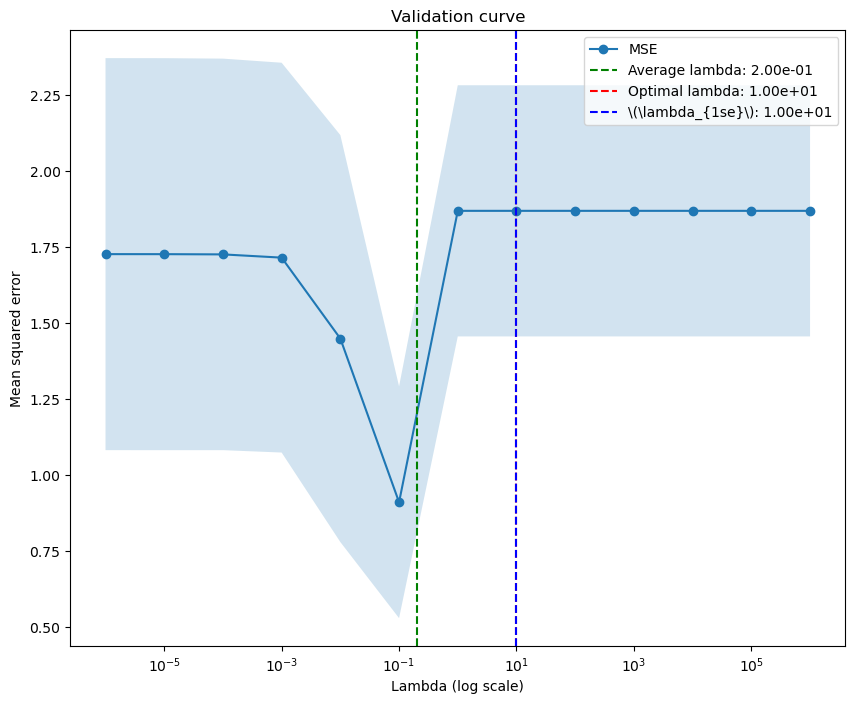

Average lambda: 2.00e-01
Optimal lambda: 1.00e+01
\(\lambda_{1se}\): 1.00e+01


In [22]:


# Part 1: Stabilizing lambda
lambda_sum = 0

# Loop to stabilize lambda
for _ in range(10):
    # Define a range for lambda to explore
    lambdas = np.linspace(0.1, 100, 1000)
    
    # Use LassoCV to perform cross-validation
    lasso = LassoCV(alphas=lambdas, cv=5) 
    lasso.fit(X_stand, y)
    
    print("Best lambda in this iteration:", lasso.alpha_)
    lambda_sum += lasso.alpha_

# Calculate the average of lambda over all iterations
lambda_avg = lambda_sum / 10
print("Average lambda:", lambda_avg)

# Part 2: Plot the validation curve
lambdas = np.logspace(-6, 6, 13)
lasso_cv = LassoCV(alphas=lambdas, cv=5)
lasso_cv.fit(X_stand, y)

# Retrieve the cross-validation scores for each lambda
mse_path = np.mean(lasso_cv.mse_path_, axis=1)

# Find the lambda that minimizes the cross-validation error
min_mse_idx = np.argmin(mse_path)
optimal_lambda = lambdas[min_mse_idx]

# Find the largest lambda that is within one standard deviation of the lowest MSE
std_mse = np.std(lasso_cv.mse_path_, axis=1)
cutoff = mse_path[min_mse_idx] + std_mse[min_mse_idx]
one_std_idx = np.where(mse_path <= cutoff)[0][-1]
lambda_1se = lambdas[one_std_idx]

# Plot the scores as a function of lambda
plt.figure(figsize=(10, 8))
plt.plot(lasso_cv.alphas_, mse_path, marker='o', label='MSE')
plt.axvline(x=lambda_avg, color='g', linestyle='--', label=f'Average lambda: {lambda_avg:.2e}')
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal lambda: {optimal_lambda:.2e}')
plt.axvline(x=lambda_1se, color='b', linestyle='--', label=f'\(\lambda_{{1se}}\): {lambda_1se:.2e}')
plt.fill_between(lasso_cv.alphas_, mse_path + std_mse, mse_path - std_mse, alpha=0.2)
plt.xscale('log')
plt.xlabel('Lambda (log scale)')
plt.ylabel('Mean squared error')
plt.title('Validation curve')
plt.legend()
plt.show()

print(f"Average lambda: {lambda_avg:.2e}")
print(f"Optimal lambda: {optimal_lambda:.2e}")
print(f"\(\lambda_{{1se}}\): {lambda_1se:.2e}")




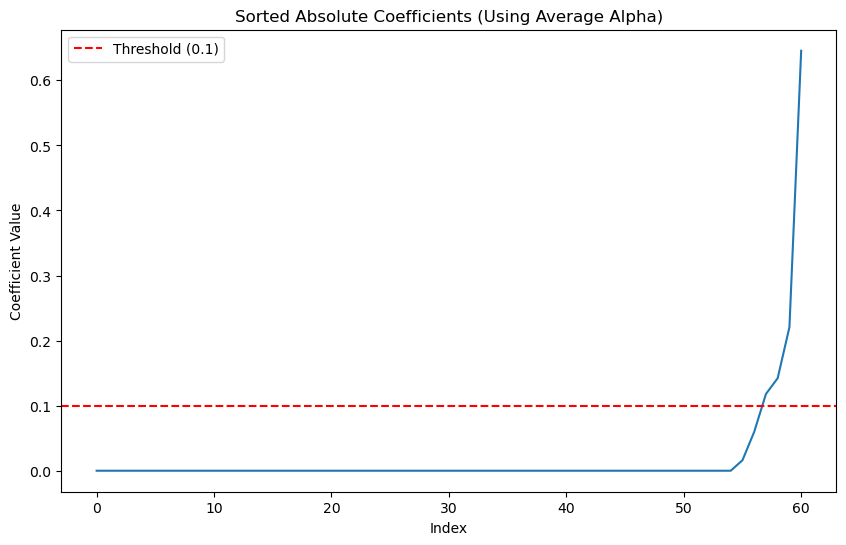

Indices of large coefficients (Using Average Alpha): [ 3  5  7  8 34 58]


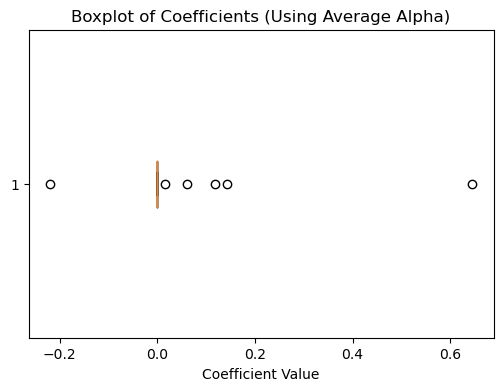

In [23]:
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt

# Ajuster un modèle Lasso avec l'alpha moyen trouvé précédemment (alpha_avg? optimal_lambda)
lasso_final_avg = Lasso(alpha=lambda_avg)#lambda_1se
lasso_final_avg.fit(X_stand, y)

# Ajuster le modèle Lasso avec l'alpha moyen trouvé précédemment
lasso_final = LassoCV(alphas=[lambda_avg], cv=5)  # Utilisation de [alpha_avg] car LassoCV s'attend à une liste d'alphas
lasso_final.fit(X_stand, y)

# Extraire les coefficients
coef_avg = lasso_final_avg.coef_

# Tracer les coefficients triés
plt.figure(figsize=(10, 6))
plt.plot(np.sort(np.abs(coef_avg)))
plt.title('Sorted Absolute Coefficients (Using Average Alpha)')
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.axhline(y=0.1, color='r', linestyle='--', label="Threshold (0.1)")
plt.legend()
plt.show()

# Identifier les coefficients dont la valeur absolue est supérieure à un seuil (par exemple, 0.1)
large_coef_idx_avg = np.where(np.abs(coef_avg) > 0.01)[0]
print("Indices of large coefficients (Using Average Alpha):", large_coef_idx_avg)

# Créer un boxplot des coefficients
plt.figure(figsize=(6, 4))
plt.boxplot(coef_avg, vert=False)
plt.title('Boxplot of Coefficients (Using Average Alpha)')
plt.xlabel('Coefficient Value')
plt.show()


## Étape 3: Analyse des Coefficients
Nous visualiserons les coefficients du modèle final pour comprendre l'importance des variables.



## Étape 4: Sélection des Variables
Nous sélectionnerons les variables importantes en fonction d'un seuil arbitraire des coefficients.

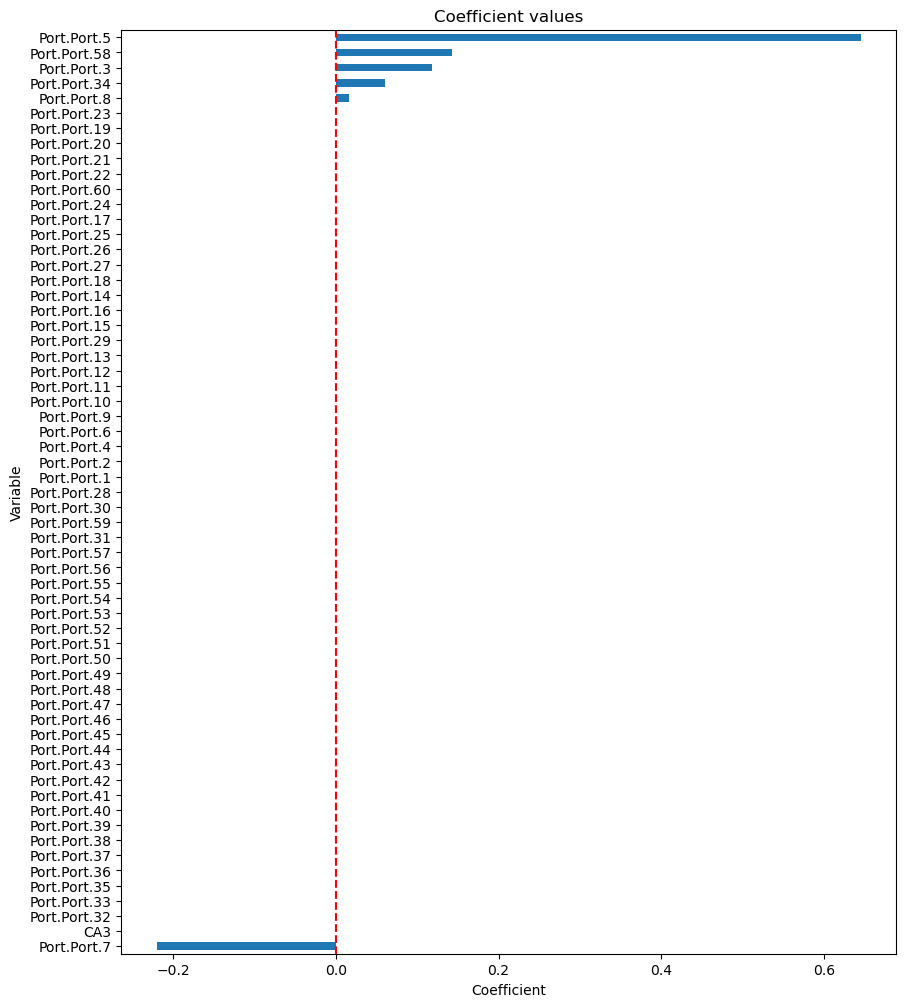

Selected variables:
Port.Port.3     0.117939
Port.Port.5     0.645567
Port.Port.7    -0.220657
Port.Port.8     0.016093
Port.Port.34    0.059781
Port.Port.58    0.142283
dtype: float64
['Port.Port.3', 'Port.Port.5', 'Port.Port.7', 'Port.Port.8', 'Port.Port.34', 'Port.Port.58']


In [24]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso

# Ajuster un modèle Lasso avec l'alpha moyen trouvé précédemment (lambda_avg, optimal_lambda, lambda_1se)
lasso_final_avg = Lasso(alpha=lambda_avg)
lasso_final_avg.fit(X_stand, y)

# Récupérer les coefficients sous forme de Series pour un accès et un tracé plus faciles
coefficients = pd.Series(lasso_final_avg.coef_, index=X.columns)

plt.figure(figsize=(10, 12))
coefficients.sort_values().plot(kind='barh')
plt.axvline(x=0.0, color='r', linestyle='--')
plt.title('Coefficient values')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

# Seuil arbitraire
threshold = 0 # Sélectionnez les coefficients différents de zéro

# Variables avec des coefficients > seuil
selected_variables = coefficients[coefficients.abs() > threshold]
selected_lasso = selected_variables.index.to_list()


# Afficher les variables sélectionnées
print("Selected variables:")
print(selected_variables)
print(selected_lasso)


# Elastic Net 

Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Best alpha in this iteration: 0.30000000000000004
Average alpha: 0.3


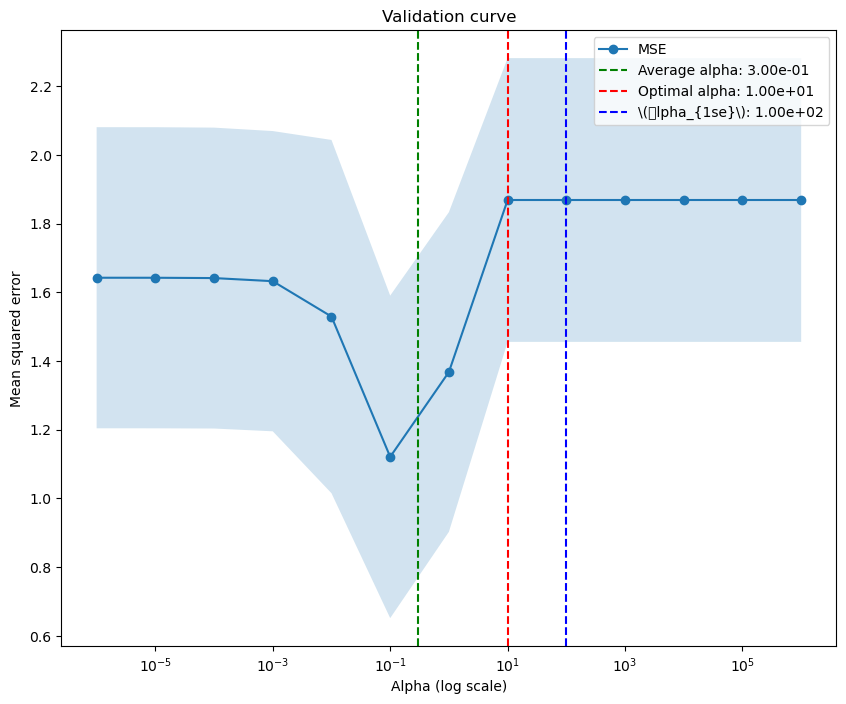

Average alpha: 3.00e-01
Optimal alpha: 1.00e+01
\(lpha_{1se}\): 1.00e+02


In [25]:
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import numpy as np

# Suppose X_stand and y are your standardized independent and dependent variables respectively
# ...

# Part 1: Stabilizing alpha
alpha_sum = 0

# Loop to stabilize alpha
for _ in range(10):
    # Define a range for alpha to explore
    alphas = np.linspace(0.1, 100, 1000)
    
    # Use ElasticNetCV to perform cross-validation
    enet = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5) # l1_ratio = 0.5 is a common starting point
    enet.fit(X_stand, y)
    
    print("Best alpha in this iteration:", enet.alpha_)
    alpha_sum += enet.alpha_

# Calculate the average of alpha over all iterations
alpha_avg = alpha_sum / 10
print("Average alpha:", alpha_avg)

# Part 2: Plot the validation curve
alphas = np.logspace(-6, 6, 13)
enet_cv = ElasticNetCV(alphas=alphas, l1_ratio=0.5, cv=5)
enet_cv.fit(X_stand, y)

# Retrieve the cross-validation scores for each alpha
mse_path = np.mean(enet_cv.mse_path_, axis=1)

# Find the alpha that minimizes the cross-validation error
optimal_alpha_idx = np.argmin(mse_path)
optimal_alpha = alphas[optimal_alpha_idx]

# Find the largest alpha that is within one standard deviation of the lowest MSE
std_mse = np.std(enet_cv.mse_path_, axis=1)
cutoff = mse_path[optimal_alpha_idx] + std_mse[optimal_alpha_idx]
one_std_idx = np.where(mse_path <= cutoff)[0][-1]
alpha_1se = alphas[one_std_idx]

# Plot the scores as a function of alpha
plt.figure(figsize=(10, 8))
plt.plot(enet_cv.alphas_, mse_path, marker='o', label='MSE')
plt.axvline(x=alpha_avg, color='g', linestyle='--', label=f'Average alpha: {alpha_avg:.2e}')
plt.axvline(x=optimal_alpha, color='r', linestyle='--', label=f'Optimal alpha: {optimal_alpha:.2e}')
plt.axvline(x=alpha_1se, color='b', linestyle='--', label=f'\(\alpha_{{1se}}\): {alpha_1se:.2e}')
plt.fill_between(enet_cv.alphas_, mse_path + std_mse, mse_path - std_mse, alpha=0.2)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean squared error')
plt.title('Validation curve')
plt.legend()
plt.show()

print(f"Average alpha: {alpha_avg:.2e}")
print(f"Optimal alpha: {optimal_alpha:.2e}")
print(f"\(\alpha_{{1se}}\): {alpha_1se:.2e}")


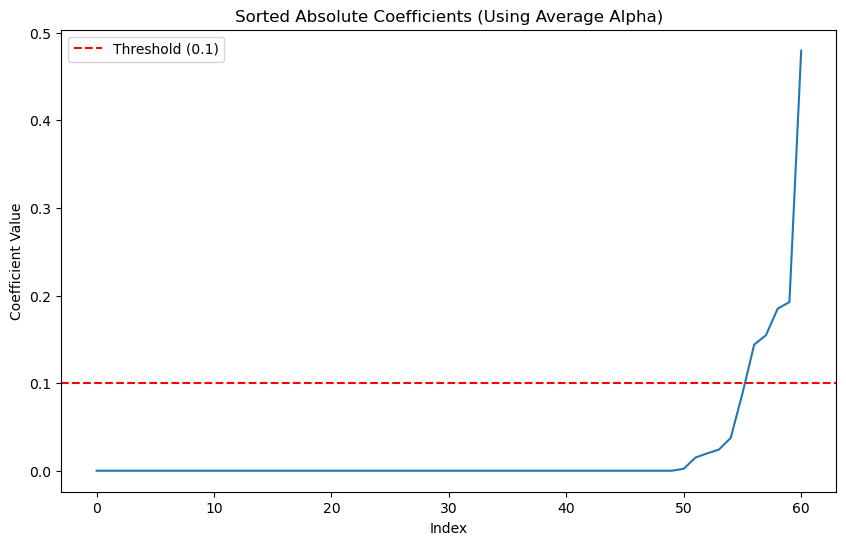

Indices of large coefficients (Using Average Alpha): [ 0  3  5  7  8 11 24 34 58 59]


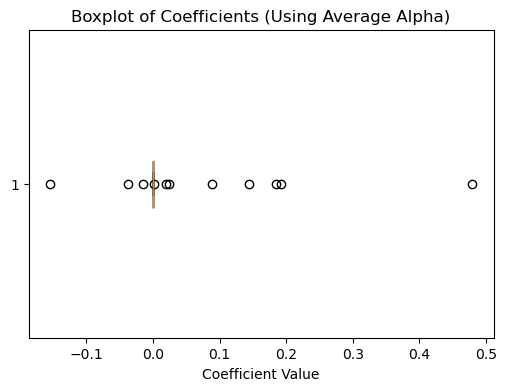

In [26]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt

# Ajuster un modèle Elastic Net avec l'alpha moyen trouvé précédemment
enet_final_avg = ElasticNet(alpha=alpha_avg, l1_ratio=0.5)  # Encore, ajustez l1_ratio si nécessaire
enet_final_avg.fit(X_stand, y)

# Extraire les coefficients
coef_avg = enet_final_avg.coef_

# Tracer les coefficients triés
plt.figure(figsize=(10, 6))
plt.plot(np.sort(np.abs(coef_avg)))
plt.title('Sorted Absolute Coefficients (Using Average Alpha)')
plt.xlabel('Index')
plt.ylabel('Coefficient Value')
plt.axhline(y=0.1, color='r', linestyle='--', label="Threshold (0.1)")
plt.legend()
plt.show()

# Identifier les coefficients dont la valeur absolue est supérieure à un seuil
large_coef_idx_avg = np.where(np.abs(coef_avg) > 0.01)[0]
print("Indices of large coefficients (Using Average Alpha):", large_coef_idx_avg)

# Créer un boxplot des coefficients
plt.figure(figsize=(6, 4))
plt.boxplot(coef_avg, vert=False)
plt.title('Boxplot of Coefficients (Using Average Alpha)')
plt.xlabel('Coefficient Value')
plt.show()


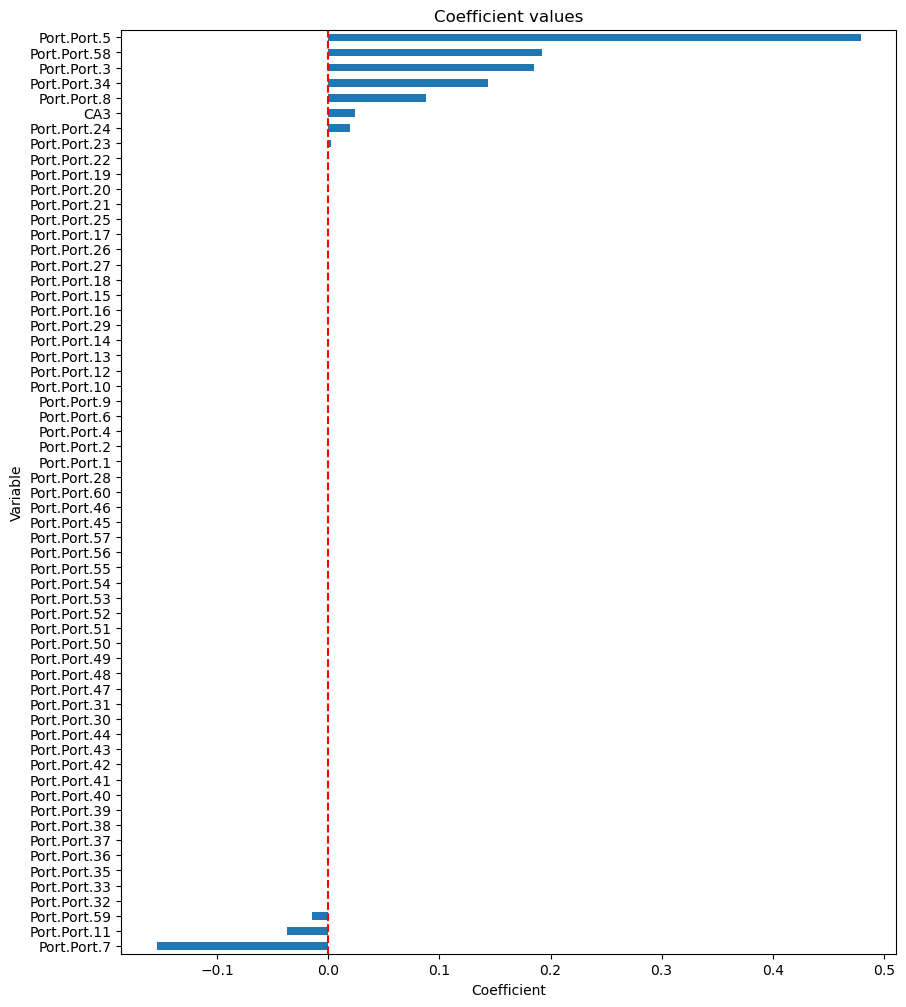

Selected variables:
CA3             0.024172
Port.Port.3     0.185029
Port.Port.5     0.479459
Port.Port.7    -0.154697
Port.Port.8     0.088215
Port.Port.11   -0.037497
Port.Port.23    0.002243
Port.Port.24    0.019821
Port.Port.34    0.143963
Port.Port.58    0.192555
Port.Port.59   -0.015083
dtype: float64
['CA3', 'Port.Port.3', 'Port.Port.5', 'Port.Port.7', 'Port.Port.8', 'Port.Port.11', 'Port.Port.23', 'Port.Port.24', 'Port.Port.34', 'Port.Port.58', 'Port.Port.59']


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import ElasticNet

# Supposons que X_stand et y sont vos variables indépendantes et dépendantes respectivement
# ...

# Ajuster un modèle ElasticNet avec l'alpha moyen trouvé précédemment
# (Vous devez vous assurer que alpha_avg est défini à partir des étapes précédentes de votre code)
enet_final_avg = ElasticNet(alpha=alpha_avg, l1_ratio=0.5)  # ajustez l1_ratio selon vos besoins
enet_final_avg.fit(X_stand, y)

# Récupérer les coefficients sous forme de Series pour un accès et un tracé plus faciles
# (Assurez-vous que X_stand est un DataFrame avec des noms de colonnes pour que cette partie fonctionne)
coefficients = pd.Series(enet_final_avg.coef_, index=X_stand.columns)

plt.figure(figsize=(10, 12))
coefficients.sort_values().plot(kind='barh')
plt.axvline(x=0.0, color='r', linestyle='--')
plt.title('Coefficient values')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

# Seuil arbitraire
threshold = 0.0  # Sélectionnez les coefficients différents de zéro

# Variables avec des coefficients > seuil
selected_variables = coefficients[coefficients.abs() > threshold]
selected_Elastic_net = selected_variables.index.to_list()

# Afficher les variables sélectionnées
print("Selected variables:")
print(selected_variables)
print(selected_Elastic_net)


## 4/ Modèle linéaire 

In [28]:
selected_Elastic_net, selected_lasso,selected_ridge

(['CA3',
  'Port.Port.3',
  'Port.Port.5',
  'Port.Port.7',
  'Port.Port.8',
  'Port.Port.11',
  'Port.Port.23',
  'Port.Port.24',
  'Port.Port.34',
  'Port.Port.58',
  'Port.Port.59'],
 ['Port.Port.3',
  'Port.Port.5',
  'Port.Port.7',
  'Port.Port.8',
  'Port.Port.34',
  'Port.Port.58'],
 ['Port.Port.3', 'Port.Port.5'])

In [29]:
# Je construis ma matrice d'entré
X_selected =X_stand[selected_lasso]

                            OLS Regression Results                            
Dep. Variable:                    CO2   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     15.33
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           5.87e-08
Time:                        23:01:51   Log-Likelihood:                -36.025
No. Observations:                  37   AIC:                             86.05
Df Residuals:                      30   BIC:                             97.33
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.4646      0.117     63.820   

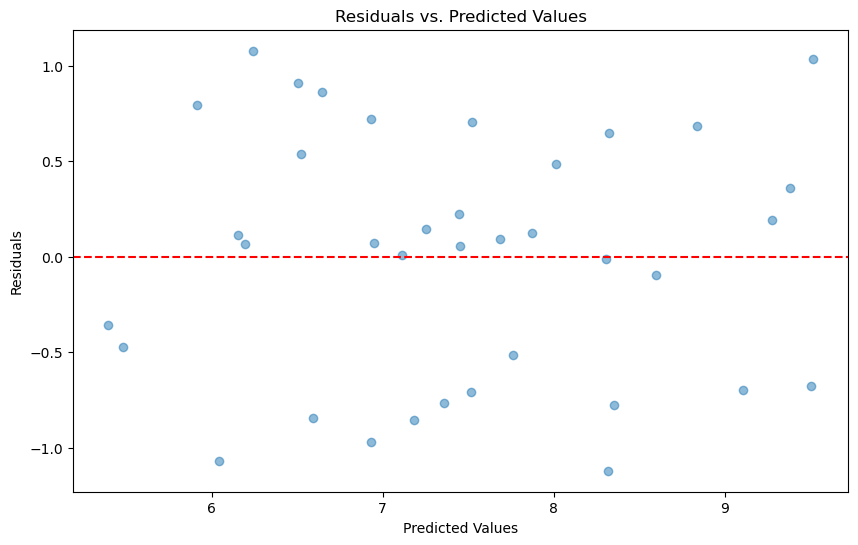

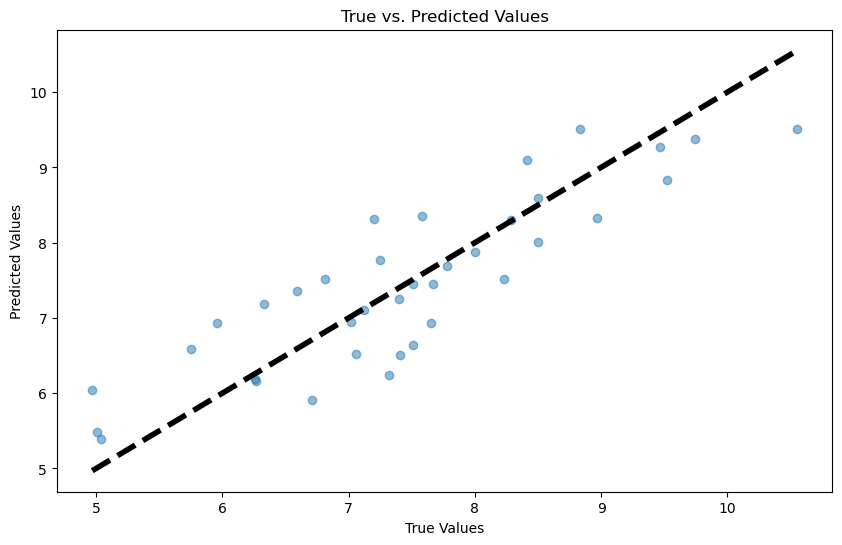

In [30]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Supposons que X_selected et y sont vos variables indépendantes et dépendantes respectivement
# ...

# Ajouter une constante à X pour le terme d'interception
X_with_const = sm.add_constant(X_selected)

# Ajuster le modèle OLS
model = sm.OLS(y, X_with_const)
results = model.fit()

# Afficher le résumé du modèle
print(results.summary())

# Prédictions
predictions = results.predict(X_with_const)

# Calcul des résidus
residuals = y - predictions

# Créer un graphique des résidus
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Créer un graphique des erreurs de prédiction
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.title('True vs. Predicted Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


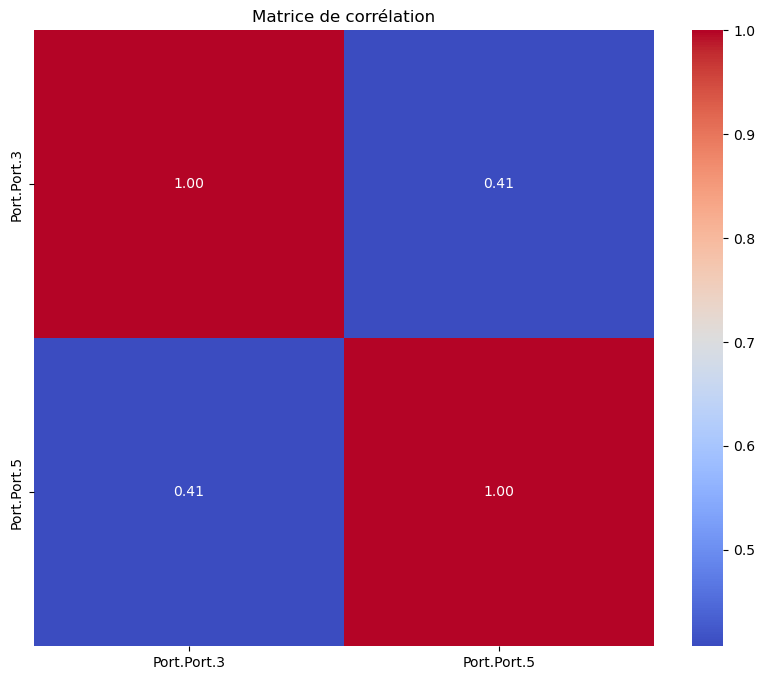

In [31]:
# Calculer la matrice de corrélation
df_rige = X_stand[selected_ridge] # , ,
corr_matrix = df_rige.corr()

# Créer un heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

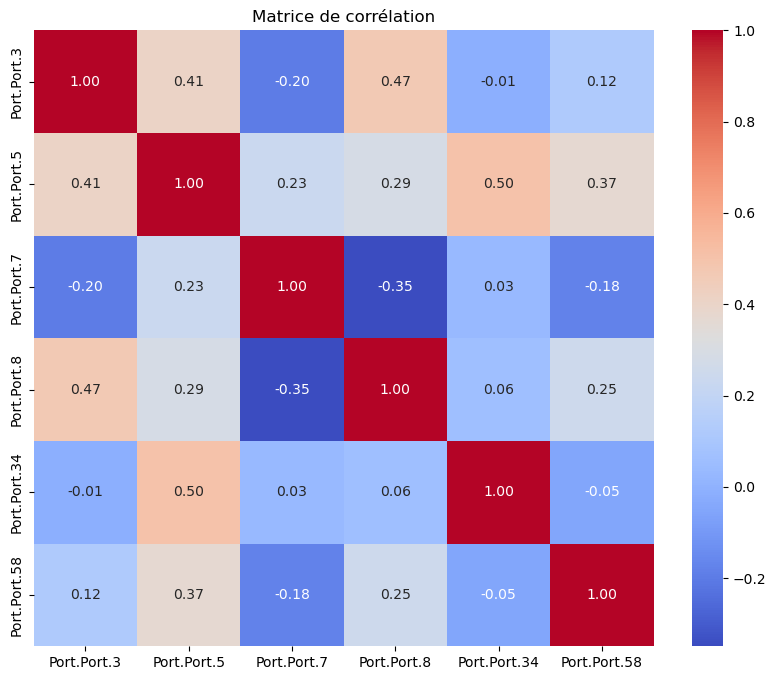

In [32]:
# Calculer la matrice de corrélation
df_lasso = X_stand[selected_lasso]
corr_matrix = df_lasso.corr()

# Créer un heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

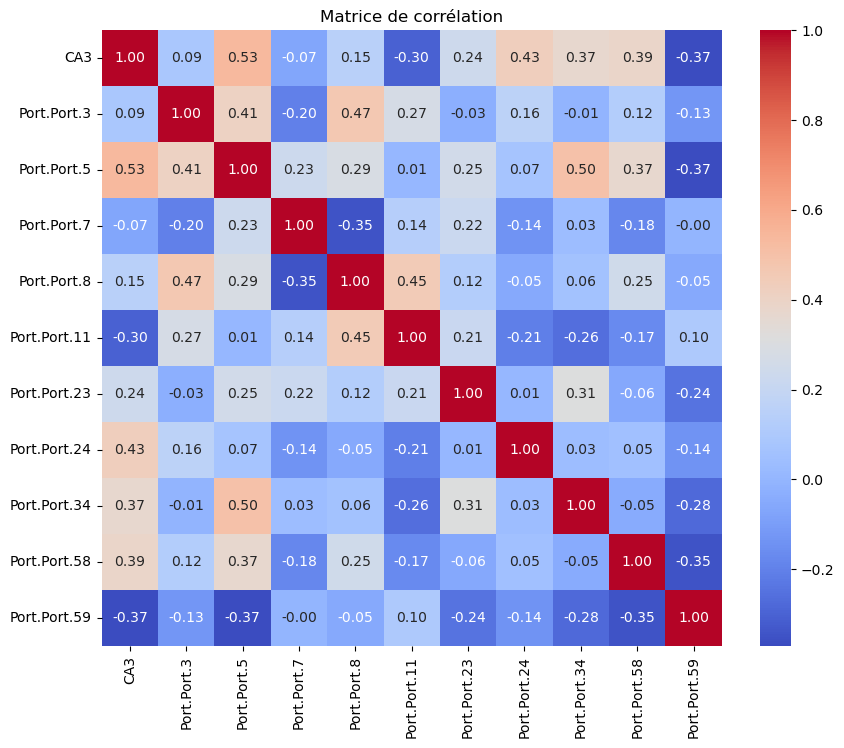

In [33]:
# Calculer la matrice de corrélation
df_elasticnet = X_stand[selected_Elastic_net]
corr_matrix = df_elasticnet.corr()

# Créer un heatmap avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()

## Régression Par Composante Principal 

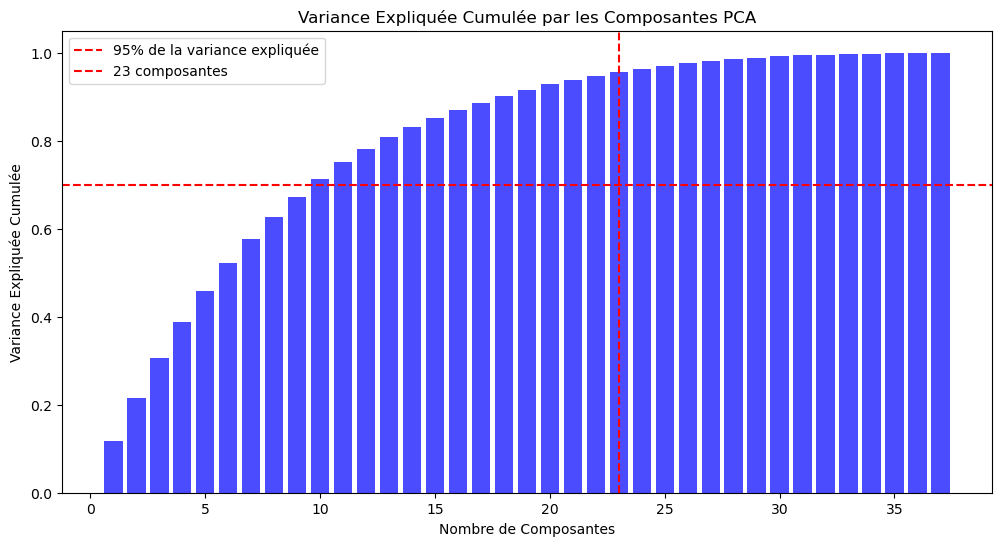

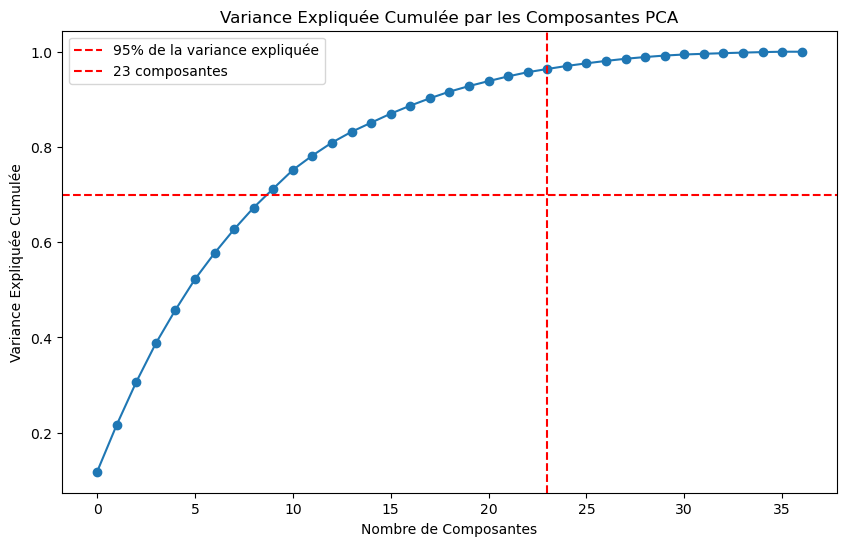

In [34]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Réalisation de la PCA
pca = PCA()
X_pca = pca.fit_transform(X_stand)

# Expliquer la variance
variance_explained = np.cumsum(pca.explained_variance_ratio_)


# Trouver le nombre optimal de composantes principales
# Critère : nombre de composantes nécessaires pour expliquer au moins 95% de la variance
n_components = np.where(variance_explained >= 0.95)[0][0] + 1

# Création d'un histogramme pour visualiser la variance expliquée cumulée
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(variance_explained) + 1), variance_explained, color='blue', alpha=0.7)
plt.axhline(y=0.70, color='r', linestyle='--', label='95% de la variance expliquée')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} composantes')
plt.title("Variance Expliquée Cumulée par les Composantes PCA")
plt.xlabel("Nombre de Composantes")
plt.ylabel("Variance Expliquée Cumulée")
plt.legend()
plt.show()



# Création d'un graphique pour visualiser la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(variance_explained, marker='o')
plt.axhline(y=0.70, color='r', linestyle='--', label='95% de la variance expliquée')
plt.axvline(x=n_components, color='r', linestyle='--', label=f'{n_components} composantes')
plt.title("Variance Expliquée Cumulée par les Composantes PCA")
plt.xlabel("Nombre de Composantes")
plt.ylabel("Variance Expliquée Cumulée")
plt.legend()



plt.show()

In [41]:
# Réaliser la PCA avec 8 composantes
pca = PCA(n_components=8)
X_pca_reduced = pca.fit_transform(X_stand)

# Régression linéaire sur les composantes principales
model = LinearRegression()
model.fit(X_pca_reduced, y)

# Prédictions, évaluations, etc., peuvent être effectuées ici selon les besoins

# Obtenir les coefficients
coefficients = model.coef_

# Appliquer un seuil pour déterminer l'importance
threshold = 0.1  # Exemple de seuil, à ajuster selon vos besoins
important_coefficients = np.where(np.abs(coefficients) > threshold)[0]

print("Coefficients importants (basés sur le seuil) :", important_coefficients)


Coefficients importants (basés sur le seuil) : [0 1 2 3 4 5 7]


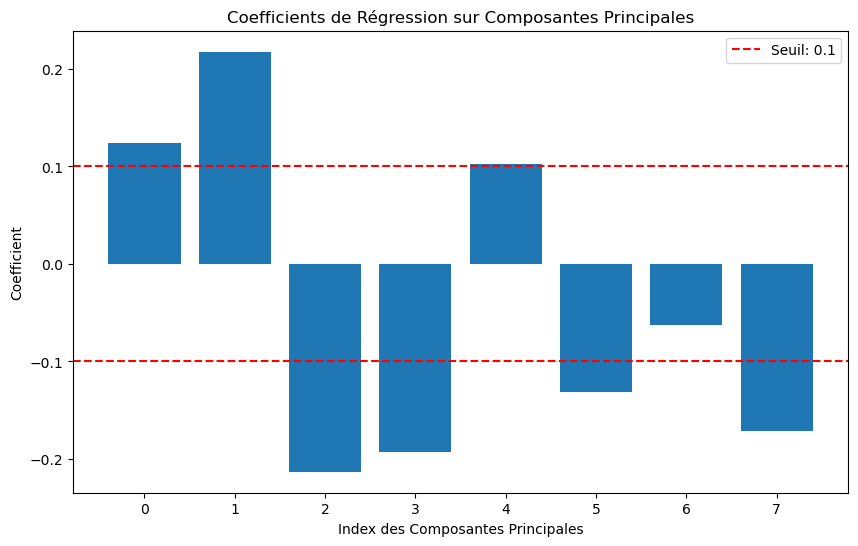

In [42]:
import matplotlib.pyplot as plt

# Créer un graphique des coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(y=0.1, color='r', linestyle='--', label='Seuil: 0.1')
plt.axhline(y=-0.1, color='r', linestyle='--')
plt.xlabel('Index des Composantes Principales')
plt.ylabel('Coefficient')
plt.title('Coefficients de Régression sur Composantes Principales')
plt.legend()
plt.show()



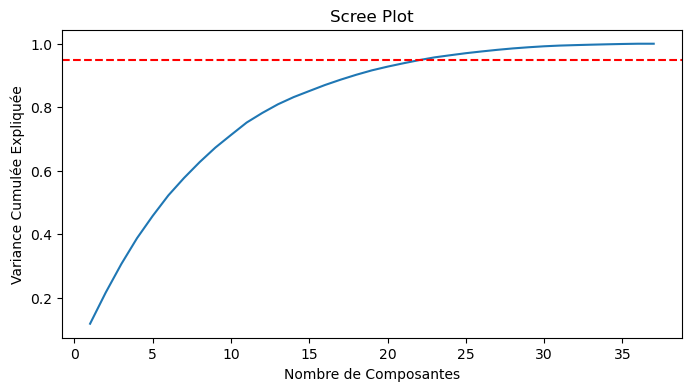

Nombre optimal de composantes pour 95% de variance expliquée : 23


In [47]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Réaliser une PCA sur toutes les composantes
pca_full = PCA()
pca_full.fit(X_stand)

# Calculer le ratio de variance expliquée
variance_ratios = pca_full.explained_variance_ratio_

# Créer un scree plot
plt.figure(figsize=(8,4))
plt.plot(range(1, len(variance_ratios) + 1), np.cumsum(variance_ratios))
plt.xlabel('Nombre de Composantes')
plt.ylabel('Variance Cumulée Expliquée')
plt.title('Scree Plot')
plt.axhline(y=0.95, color='r', linestyle='--')  # Ligne pour le seuil de 95% de variance expliquée
plt.show()

# Déterminer le nombre optimal de composantes pour 95% de variance expliquée
optimal_n_components = np.where(np.cumsum(variance_ratios) >= 0.95)[0][0] + 1
print("Nombre optimal de composantes pour 95% de variance expliquée :", optimal_n_components)


# PLS 

Meilleur nombre de composantes: 2
Erreur quadratique moyenne: 0.329620019911715
Score R²: 0.8024696762877636


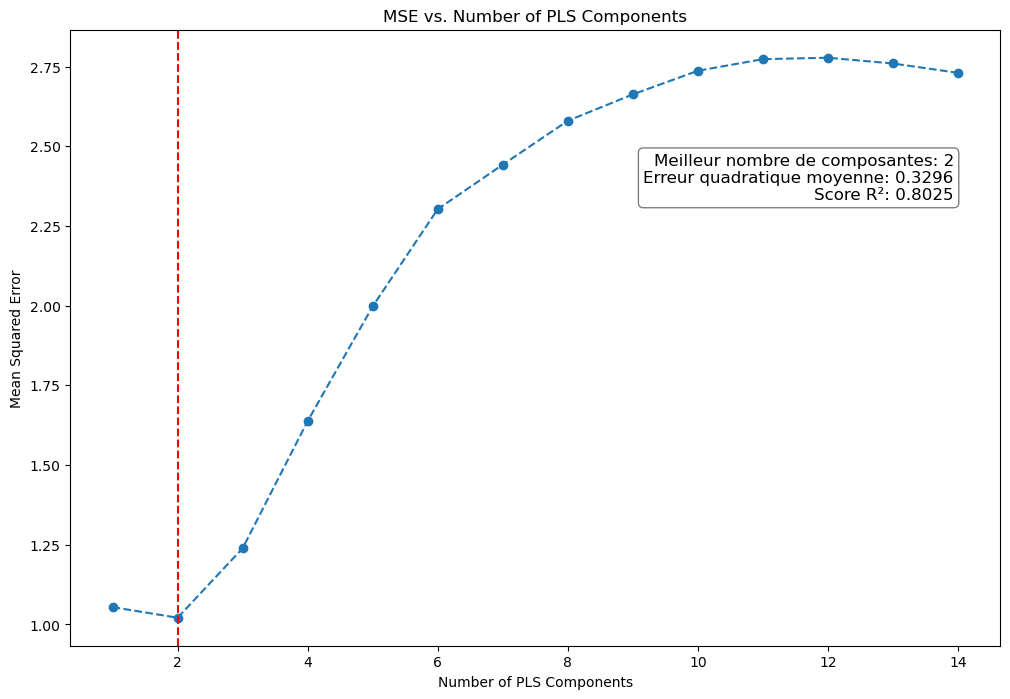

In [44]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nombre de composantes à tester
n_components = range(1, 15)

# Initialisation pour la recherche du meilleur nombre de composantes
min_mse = np.inf
best_n = 0
mse_values = []

for n in n_components:
    pls = PLSRegression(n_components=n)
    # Validation croisée
    y_cv = cross_val_predict(pls, X_stand, y, cv=10)
    mse = mean_squared_error(y, y_cv)
    mse_values.append(mse)
    if mse < min_mse:
        min_mse = mse
        best_n = n

# Ajustement du modèle avec le meilleur nombre de composantes
pls_best = PLSRegression(n_components=best_n)
pls_best.fit(X_stand, y)
y_pred = pls_best.predict(X_stand)

# Affichage des résultats
print(f"Meilleur nombre de composantes: {best_n}")
print(f"Erreur quadratique moyenne: {mean_squared_error(y, y_pred)}")
print(f"Score R²: {r2_score(y, y_pred)}")

# Tracer l'évolution de l'erreur en fonction du nombre de composantes
plt.figure(figsize=(12, 8))
plt.plot(n_components, mse_values, marker='o', linestyle='--')
plt.xlabel('Number of PLS Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Number of PLS Components')

# Ajouter un trait rouge pour le meilleur nombre de composantes
plt.axvline(x=best_n, color='red', linestyle='--')

# Déplacer les annotations vers le bas
info_text = (f'Meilleur nombre de composantes: {best_n}\n'
             f'Erreur quadratique moyenne: {mean_squared_error(y, y_pred):.4f}\n'
             f'Score R²: {r2_score(y, y_pred):.4f}')
plt.text(0.95, 0.80, info_text, ha='right', va='top', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()


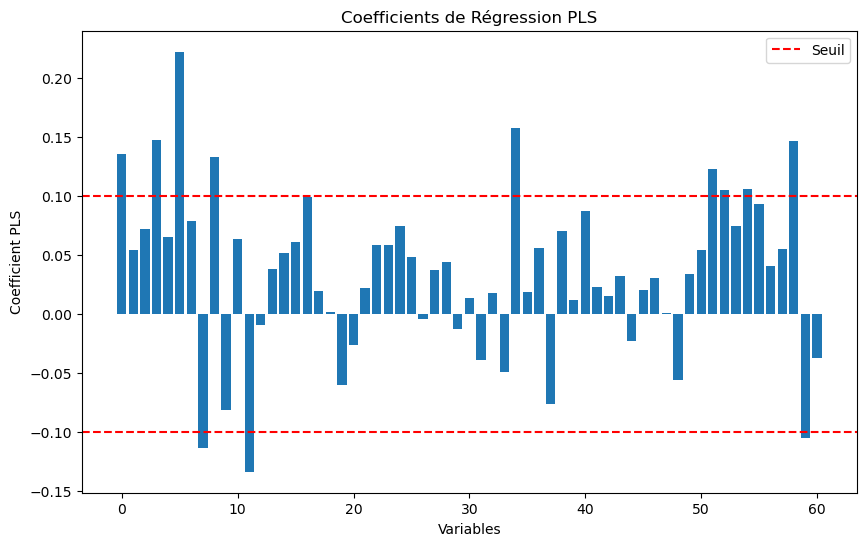

Coefficients importants (basés sur le seuil) : [ 0  3  5  7  8 11 34 51 52 54 58 59]


In [45]:
# Obtenir les coefficients
coefficients_pls = pls_best.coef_.ravel()

# Appliquer un seuil pour déterminer les coefficients importants
threshold = 0.1  # Exemple de seuil
important_coefficients_pls = np.where(np.abs(coefficients_pls) > threshold)[0]

# Créer un graphique des coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients_pls)), coefficients_pls)
plt.axhline(y=threshold, color='r', linestyle='--', label='Seuil')
plt.axhline(y=-threshold, color='r', linestyle='--')
plt.xlabel('Variables')
plt.ylabel('Coefficient PLS')
plt.title('Coefficients de Régression PLS')
plt.legend()
plt.show()

print("Coefficients importants (basés sur le seuil) :", important_coefficients_pls)


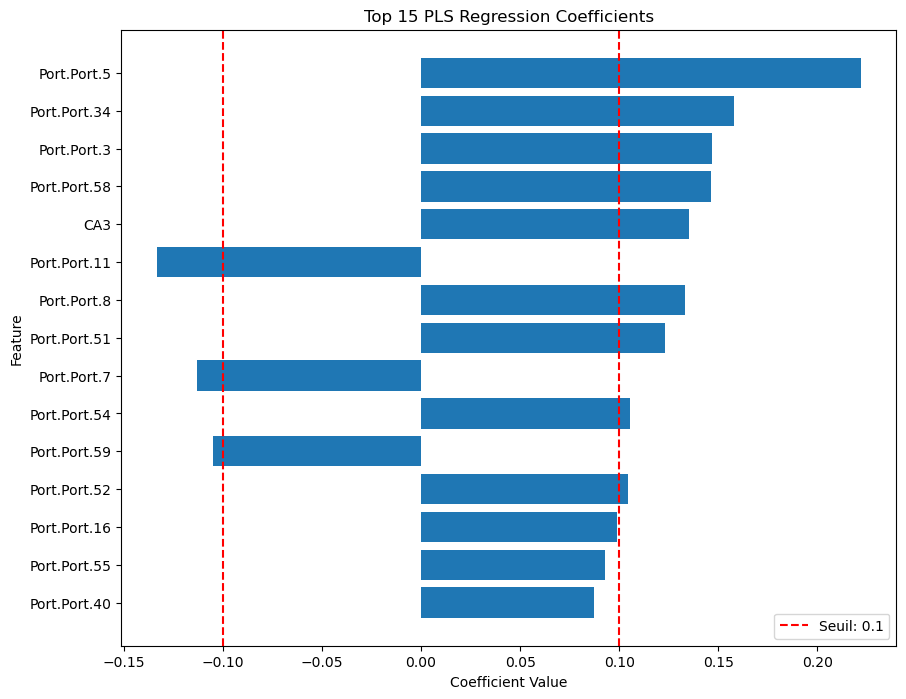

Coefficients importants:
               Coefficient
CA3              0.135071
Port.Port.3      0.147037
Port.Port.5      0.222029
Port.Port.7     -0.113361
Port.Port.8      0.133169
Port.Port.11    -0.133547
Port.Port.34     0.157751
Port.Port.51     0.123073
Port.Port.52     0.104566
Port.Port.54     0.105667
Port.Port.58     0.146198
Port.Port.59    -0.105221


In [46]:
# Coefficients de la régression PLS
coefficients = pls_best.coef_.ravel()

# Créer un DataFrame pour les coefficients
coeff_df = pd.DataFrame(coefficients, index=X_stand.columns, columns=['Coefficient'])

# Trier les coefficients par leur valeur absolue en ordre décroissant et sélectionner les 15 plus importants
sorted_coeff_df = coeff_df.reindex(coeff_df.Coefficient.abs().sort_values(ascending=False).index).head(15)

# Visualisation des coefficients
plt.figure(figsize=(10, 8))
plt.barh(sorted_coeff_df.index, sorted_coeff_df['Coefficient'])
plt.axvline(x=0.1, color='red', linestyle='--', label='Seuil: 0.1')
plt.axvline(x=-0.1, color='red', linestyle='--')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Top 15 PLS Regression Coefficients')
plt.gca().invert_yaxis()  # Inverser l'axe Y pour afficher les coefficients les plus importants en haut
plt.legend()
plt.show()


# Identifier et afficher les coefficients importants
seuil = 0.1  # Ajuster selon les besoins
importants = coeff_df[np.abs(coeff_df['Coefficient']) > seuil]
print("Coefficients importants:\n", importants)